In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = "Malgun Gothic"

In [2]:
from datetime import datetime

In [3]:
import plotly.express as px

In [4]:
dt1 = pd.read_csv('log_order.csv')
dt2 = pd.read_csv('master_member.csv')
dt3 = pd.read_csv('master_product.csv')

In [5]:
dt1.isnull().sum()

결제수단              0
공급원가             88
교환구분              0
네이버 포인트           0
배송번호              0
배송비 정보            0
배송시작일             0
배송완료일             0
사용한 적립금액          0
상품구매금액            0
상품명              88
상품번호             88
상품별 추가할인금액        0
수량                0
수령인 주소            8
주문 시 회원등급      3105
주문경로              0
주문번호              0
주문일시              0
주문자ID          3105
카드사           30138
쿠폰 할인금액           0
판매가               0
품목번호              0
dtype: int64

In [6]:
dt1[dt1['카드사'].isna()]['결제수단'].unique()

array(['무통장입금', '적립금,무통장입금', '적립금', '휴대폰', '적립금,가상계좌', '가상계좌', '예치금',
       '예치금,적립금,무통장입금', '쿠폰,무통장입금', '페이나우(실시간 계좌이체)', '예치금,무통장입금',
       '실시간계좌이체', '예치금,쿠폰,무통장입금', '카카오페이(카카오머니)', '적립금,카카오페이(카카오머니)',
       '쿠폰,예치금', '쿠폰,가상계좌', '적립금,페이나우(실시간 계좌이체)', '에스크로(실시간계좌이체)',
       '쿠폰,휴대폰', '적립금,휴대폰', '쿠폰,에스크로(실시간계좌이체)', '무통장입금,휴대폰',
       '무통장입금,실시간계좌이체', '예치금,휴대폰', '적립금,실시간계좌이체', '에스크로(가상계좌)',
       '예치금,실시간계좌이체'], dtype=object)

In [7]:
dt1[dt1['수령인 주소'].isna()]

결제수단     공급원가  교환구분  네이버 포인트                   배송번호 배송비 정보  \
2815   무통장입금  37400.0  교환안함        0  D-20190128-0000102-00     무료   
21847  무통장입금  12650.0  교환안함        0  D-20180514-0000232-00     무료   
37413  무통장입금  75680.0  교환안함        0  D-20181104-0000028-00     무료   
37414  무통장입금  37400.0  교환안함        0  D-20181104-0000028-01     무료   
37415  무통장입금      0.0  교환안함        0  D-20181104-0000028-00     무료   
46435     카드  49500.0  교환안함        0  D-20171129-0000016-00     무료   
46436     카드  56100.0  교환안함        0  D-20171129-0000016-01     무료   
46437     카드  36300.0  교환안함        0  D-20171129-0000016-02     무료   

                    배송시작일               배송완료일  사용한 적립금액  상품구매금액  ... 수령인 주소  \
2815   2019-01-29 오전 8:45  2019-02-02 오전 5:32         0   58410  ...    NaN   
21847  2018-05-17 오후 1:29  2018-05-21 오전 5:32         0   30840  ...    NaN   
37413  2018-11-06 오후 6:45  2018-11-10 오전 5:32         0  118140  ...    NaN   
37414  2018-11-05 오후 6:15  2018-11-09 오전 5:32         0   58410  ...    NaN   
37415  2018-11-05 오후 6:15  2018-11-09 오전 5:32         0       0  ...    NaN   
46435  2017-11-29 오후 5:34  2017-12-03 오전 5:38         0   79200  ...    NaN   
46436  2017-11-29 오후 5:34  2017-12-03 오전 5:38         0   86240  ...    NaN   
46437  2017-11-29 오후 5:34  2017-12-03 오전 5:38         0   56100  ...    NaN   

       주문 시 회원등급   주문경로              주문번호                 주문일시       주문자ID  \
2815         사업자  PC쇼핑몰  20190128-0000102   2019-01-28 오전 9:03  kang701211   
21847        사업자   모바일웹  20180514-0000232  2018-05-14 오전 11:16   toristar3   
37413         일반   모바일웹  20181104-0000028  2018-11-04 오전 11:38  kang701211   
37414         일반   모바일웹  20181104-0000028  2018-11-04 오전 11:38  kang701211   
37415         일반   모바일웹  20181104-0000028  2018-11-04 오전 11:38  kang701211   
46435         일반   모바일웹  20171129-0000016  2017-11-29 오전 12:45      qsd681   
46436         일반   모바일웹  20171129-0000016  2017-11-29 오전 12:45      qsd681   
46437         일반   모바일웹  20171129-0000016  2017-11-29 오전 12:45      qsd681   

                 카드사 쿠폰 할인금액     판매가   품목번호  
2815             NaN       0   58410  49413  
21847            NaN       0   30840   9723  
37413            NaN       0  118140  32272  
37414            NaN       0   58410  32273  
37415            NaN       0       0  32275  
46435  신한(구.LG카드 포함)       0   79200   2513  
46436  신한(구.LG카드 포함)       0   86240   2514  
46437  신한(구.LG카드 포함)       0   56100   2515  

[8 rows x 24 columns]

In [8]:
dt2[dt2['사용가능 적립금'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 6560
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1989 non-null   object
 1   나이         1989 non-null   int64 
 2   사용가능 적립금   1989 non-null   int64 
 3   성별         1989 non-null   object
 4   주소(동/읍/면)  1921 non-null   object
 5   최종접속일      1956 non-null   object
 6   최종주문일      1824 non-null   object
 7   유입경로       1989 non-null   object
 8   유입기기       1989 non-null   object
 9   회원 가입일     1989 non-null   object
 10  사업자구분      1989 non-null   object
 11  회원구분       1989 non-null   object
dtypes: int64(2), object(10)
memory usage: 202.0+ KB


In [9]:
dt2[dt2['사용가능 적립금'] == 0]['사업자구분'].unique()

array(['개인', '사업자'], dtype=object)

In [10]:
dt2['사업자구분'].unique()

array(['개인', '사업자', '외국인'], dtype=object)

In [11]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         6575 non-null   object
 1   나이         6575 non-null   int64 
 2   사용가능 적립금   6575 non-null   int64 
 3   성별         6575 non-null   object
 4   주소(동/읍/면)  5941 non-null   object
 5   최종접속일      6523 non-null   object
 6   최종주문일      5153 non-null   object
 7   유입경로       6575 non-null   object
 8   유입기기       6575 non-null   object
 9   회원 가입일     6575 non-null   object
 10  사업자구분      6575 non-null   object
 11  회원구분       6575 non-null   object
dtypes: int64(2), object(10)
memory usage: 616.5+ KB


In [12]:
dt = dt1.merge(dt2, how='left', left_on='주문자ID', right_on='ID')

In [13]:
dt.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', 'ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일',
       '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분'],
      dtype='object')

In [14]:
dt[dt['주소(동/읍/면)'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3503 entries, 2 to 46747
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   결제수단        3503 non-null   object 
 1   공급원가        3460 non-null   float64
 2   교환구분        3503 non-null   object 
 3   네이버 포인트     3503 non-null   int64  
 4   배송번호        3503 non-null   object 
 5   배송비 정보      3503 non-null   object 
 6   배송시작일       3503 non-null   object 
 7   배송완료일       3503 non-null   object 
 8   사용한 적립금액    3503 non-null   int64  
 9   상품구매금액      3503 non-null   int64  
 10  상품명         3460 non-null   object 
 11  상품번호        3460 non-null   float64
 12  상품별 추가할인금액  3503 non-null   int64  
 13  수량          3503 non-null   int64  
 14  수령인 주소      3495 non-null   object 
 15  주문 시 회원등급   398 non-null    object 
 16  주문경로        3503 non-null   object 
 17  주문번호        3503 non-null   object 
 18  주문일시        3503 non-null   object 
 19  주문자ID       398 non-null  

In [15]:
dt1_cnt=dt1.groupby('주문자ID', as_index=False)[['주문일시']].count()

In [16]:
dt1_cnt['주문일시'].unique()

array([  1,  45,   3,   2,   4,   8,   9,  66,   7,   6,  13,   5,  11,
        12,  20,  10,  56,  26,  14,  24,  33,  21,  53,  37,  64,  40,
        73,  31,  19,  29,  16,  17,  27,  32, 152,  43,  15,  50,  22,
        23,  60,  94,  39,  28,  74,  58,  65,  25,  35,  18,  52,  46,
       267,  87,  99,  54,  30,  34,  67,  57,  55,  47,  79,  41, 114,
       197,  48,  44,  42,  59, 172, 126,  75, 105,  96,  63,  51,  83,
        80,  49,  72,  36, 251,  70, 145,  82, 232, 129,  77,  76, 295,
        38,  61,  81,  90,  84,  98, 119,  68, 214, 132, 103,  69, 118,
       115, 108,  88, 135, 163,  86,  62], dtype=int64)

In [17]:
dt1 = dt1.drop('교환구분', axis=1)

In [18]:
dt2['유입경로'].unique()

array(['블로그광고', '이메일광고', 'SNS광고', '인터넷기사광고', '카카오톡광고', '신문광고', '기타',
       '지인추천', '잡지광고', '인터넷검색', '전단지광고', '유튜브광고'], dtype=object)

In [19]:
dt2[(dt2['유입경로'] == '신문광고') | (dt2['유입경로'] == '지인추천') | (dt2['유입경로'] == '잡지광고') | (dt2['유입경로'] == '전단지광고')]

ID  나이  사용가능 적립금  성별                       주소(동/읍/면)  \
26      kyen1311  69      5820  여자        충청북도 청주시 서원구 남이면 가마3길 48   
38       deadand  37         0  남자         대구광역시 동구 첨단로8길 10 (신서동)   
42    jjamno1004  38         0  여자           광주광역시 서구 운천로 54 (금호동)   
113    yskim2937  75      1400  남자       서울특별시 관악구 신림로11길 51 (신림동)   
343       jogoya  38       600  남자      제주특별자치도 제주시 남광북3길 7 (이도이동)   
...          ...  ..       ...  ..                             ...   
6551     pme1024  46      1000  남자         전라남도 순천시 연향상가길 17 (연향동)   
6554     seb0720  47      1000  남자            경기도 양주시 백석읍 꿈나무로 291   
6559     kms9554  47      1000  남자  부산광역시 강서구 명지오션시티7로 41-10 (명지동)   
6565  wjdtnsghhh  47      1000  남자             강원도 원주시 호저면 만종리 597   
6571   jsuee8228  45      1000  남자      경상북도 구미시 산호대로29길 7-7 (옥계동)   

                    최종접속일                최종주문일   유입경로 유입기기      회원 가입일 사업자구분  \
26    2019-03-24 오후 11:32  2019-03-24 오후 11:37   신문광고   PC  2017-03-03   사업자   
38     2017-07-05 오후 2:19   2017-06-19 오후 7:56   신문광고   PC  2017-03-23   사업자   
42     2017-03-26 오전 8:14                  NaN   신문광고   PC  2017-03-26   사업자   
113    2018-02-06 오후 2:10  2018-01-18 오전 11:57   신문광고  모바일  2017-05-11    개인   
343   2019-03-03 오후 12:54  2019-03-03 오후 12:55   신문광고   PC  2017-10-27    개인   
...                   ...                  ...    ...  ...         ...   ...   
6551   2019-05-31 오전 8:58                  NaN  전단지광고  모바일  2019-05-29   사업자   
6554  2019-05-29 오전 12:21                  NaN   지인추천  모바일  2019-05-29    개인   
6559   2019-05-30 오후 5:23                  NaN  전단지광고  모바일  2019-05-30   사업자   
6565  2019-05-30 오전 10:15                  NaN  전단지광고   PC  2019-05-30   사업자   
6571   2019-06-21 오후 9:38                  NaN  전단지광고   PC  2019-06-05   사업자   

     회원구분  
26    사업자  
38    사업자  
42    사업자  
113    일반  
343   사업자  
...   ...  
6551   일반  
6554   일반  
6559   일반  
6565   일반  
6571   일반  

[1800 rows x 12 columns]

In [20]:
dt1['주문일시'] = dt1['주문일시'].apply(lambda x: x.replace('오전', 'am').replace('오후', 'pm'))
dt1['주문일시'] = pd.to_datetime(dt1['주문일시'], format = '%Y-%m-%d %p %I:%M')
dt1['주문일시']

0       2018-12-27 14:54:00
1       2018-12-29 13:22:00
2       2018-12-30 15:15:00
3       2018-12-31 10:30:00
4       2018-12-31 10:43:00
                ...        
46744   2017-12-29 13:39:00
46745   2017-12-29 17:16:00
46746   2017-12-30 18:56:00
46747   2017-12-31 10:00:00
46748   2017-12-31 18:15:00
Name: 주문일시, Length: 46749, dtype: datetime64[ns]

In [21]:
dt1['배송시작일'] = dt1['배송시작일'].apply(lambda x: x.replace('오전', 'am').replace('오후', 'pm'))
dt1['배송시작일'] = pd.to_datetime(dt1['배송시작일'], format = '%Y-%m-%d %p %I:%M')
dt1['배송시작일']

0       2019-01-07 08:56:00
1       2019-01-03 09:30:00
2       2019-01-03 09:30:00
3       2019-01-03 09:30:00
4       2019-01-07 08:56:00
                ...        
46744   2017-12-29 16:32:00
46745   2018-01-03 09:45:00
46746   2018-01-02 19:06:00
46747   2018-01-03 14:00:00
46748   2018-01-03 12:43:00
Name: 배송시작일, Length: 46749, dtype: datetime64[ns]

In [22]:
dt1['배송완료일'] = dt1['배송완료일'].apply(lambda x: x.replace('오전', 'am').replace('오후', 'pm'))
dt1['배송완료일'] = pd.to_datetime(dt1['배송완료일'], format = '%Y-%m-%d %p %I:%M')
dt1['배송완료일']

0       2019-01-11 05:32:00
1       2019-01-07 05:32:00
2       2019-01-07 05:32:00
3       2019-01-07 05:32:00
4       2019-01-11 05:32:00
                ...        
46744   2018-01-02 05:31:00
46745   2018-01-07 05:38:00
46746   2018-01-11 02:46:00
46747   2018-01-06 18:06:00
46748   2018-01-07 05:38:00
Name: 배송완료일, Length: 46749, dtype: datetime64[ns]

In [23]:
dt_D = dt1['배송완료일'] - dt1['주문일시']
dt_D['배송걸린기간'] = dt1['배송완료일'] - dt1['주문일시']
dt_D['배송걸린기간'] = dt_D['배송걸린기간'].astype(str)
dt1['배송걸린기간']=dt_D['배송걸린기간'].apply(lambda x: ' '.join(x.split(' ')[:1]))
dt1['배송걸린기간'] = dt1['배송걸린기간'].astype(int)

In [24]:
dt1['택배배송'] = dt1['배송완료일'] - dt1['배송시작일']

In [25]:
dt1['택배배송'] = dt1['택배배송'].astype('str')

In [26]:
dt1['택배배송'] = dt1['택배배송'].apply(lambda x: ' '.join(x.split(' ')[:1]))

In [27]:
dt1['택배배송'] = dt1['택배배송'].astype('int')

In [28]:
dt1['재고준비기간'] = dt1['배송걸린기간'] - dt1['택배배송']

In [29]:
dt1_ready = dt1[['재고준비기간', '상품명','상품번호','수량','수령인 주소']]

In [30]:
dt1_ready.sort_values(by='재고준비기간', ascending=False, inplace=True)

C:\Users\operation\AppData\Local\Temp\ipykernel_8\2545173246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1_ready.sort_values(by='재고준비기간', ascending=False, inplace=True)


In [31]:
dt1_ready['상품번호'] = dt1_ready['상품번호'].astype('str')

C:\Users\operation\AppData\Local\Temp\ipykernel_8\223825272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1_ready['상품번호'] = dt1_ready['상품번호'].astype('str')


In [32]:
dt1_ready.head(10)

재고준비기간                                             상품명    상품번호  수량  \
27922     155              92파이 아이스컵 뚜껑 돔형 구멍있음 PET 1000개 1박스   217.0   1   
45106     143                   반찬용기 204 1칸 블랙 800개 1set(2박스)  1226.0   1   
31640     109   70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)    38.0   1   
6406       86                     실링용기 1호 백색 1,350ml 800개 1박스   104.0   1   
41062      73                   실링기계 250 수동 식품포장 몰드교체형 몰드1개포함  1131.0   1   
3481       73                           비닐봉투 맛난거들었쪙 대 백색 200개  1266.0   1   
41061      73                 PP 5칸 도시락용기 04 200개 1박스(작은 사이즈)   447.0   1   
3479       64     170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스)   184.0   1   
37032      49  75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)    40.0   1   
37035      47                             비닐봉투 배달중 특대 백색 100개  1269.0   2   

                            수령인 주소  
27922        충청남도 아산시 둔포면 신항리 62-5  
45106         광주광역시 북구 송해로 7 (삼각동)  
31640             강원도 삼척시 남양동 93-5  
6406        강원도 화천군 사내면 사창리 457-12  
41062  인천광역시 남동구 인하로507번길 63 (구월동)  
3481     경상남도 진주시 새들말로 76-13 (평거동)  
41061        충청북도 충주시 중앙탑면 원앙4길 96  
3479        경상남도 창원시 의창구 도계동 403-6  
37032          인천광역시 부평구 삼산동 445-5  
37035        부산광역시 기장군 정관읍 구연2로 53

In [33]:
dt1[dt1['상품번호'] == 217][['배송걸린기간','택배배송','재고준비기간']]

배송걸린기간  택배배송  재고준비기간
146         5     5       0
917         4     3       1
1237        5     3       2
1461        4     3       1
2440        4     3       1
...       ...   ...     ...
46210      10     9       1
46224       4     3       1
46308       2     1       1
46352       5     3       2
46528       3     3       0

[276 rows x 3 columns]

In [34]:
dt1['지역'] = dt1['수령인 주소'].dropna().apply(lambda x:' '.join(x.split(' ')[:2]))

In [35]:
dt1['지역']

0            경상남도 거제시
1          서울특별시 동대문구
2        세종특별자치시 호려울로
3          부산광역시 부산진구
4          부산광역시 해운대구
             ...     
46744       서울특별시 서초구
46745        경기도 의정부시
46746        대전광역시 서구
46747        광주광역시 서구
46748        충청남도 천안시
Name: 지역, Length: 46749, dtype: object

In [36]:
dt1_cnt = dt1.groupby('지역', as_index='False')[['주문일시']].agg('count')
dt1_cnt.reset_index(inplace=True)
dt1_cnt

지역  주문일시
0      강원 강릉시     1
1     강원도 강릉시   365
2     강원도 고성군    39
3     강원도 동해시   197
4     강원도 삼척시    87
..        ...   ...
264  충청북도 제천시   202
265  충청북도 증평군   176
266  충청북도 진천군   186
267  충청북도 청주시   730
268  충청북도 충주시   289

[269 rows x 2 columns]

In [37]:
dt1_days = dt1.groupby('지역', as_index='False')[['배송걸린기간','택배배송','재고준비기간']].agg('mean')
dt1_days.reset_index(inplace=True)
dt1_days['cnt'] = dt1_cnt['주문일시']
dt1_days

지역    배송걸린기간      택배배송    재고준비기간  cnt
0      강원 강릉시  8.000000  8.000000  0.000000    1
1     강원도 강릉시  5.041096  3.263014  1.778082  365
2     강원도 고성군  5.487179  3.564103  1.923077   39
3     강원도 동해시  4.309645  3.071066  1.238579  197
4     강원도 삼척시  6.356322  3.620690  2.735632   87
..        ...       ...       ...       ...  ...
264  충청북도 제천시  5.084158  3.717822  1.366337  202
265  충청북도 증평군  4.244318  3.022727  1.221591  176
266  충청북도 진천군  4.639785  3.188172  1.451613  186
267  충청북도 청주시  4.264384  3.109589  1.154795  730
268  충청북도 충주시  5.038062  3.173010  1.865052  289

[269 rows x 5 columns]

In [38]:
dt1_days.sort_values(by = '재고준비기간', ascending=False)

지역    배송걸린기간      택배배송    재고준비기간  cnt
179  세종특별자치시 연서면  9.111111  3.444444  5.666667    9
77      경상북도 고령군  6.750000  3.000000  3.750000    4
17       강원도 화천군  6.972973  3.297297  3.675676   37
223     전라남도 함평군  6.571429  3.000000  3.571429    7
236     전라북도 장수군  6.125000  3.000000  3.125000    8
..           ...       ...       ...       ...  ...
191       인천 부평구  9.000000  9.000000  0.000000    1
192        인천 중구  7.000000  7.000000  0.000000    1
138       서울 용산구  8.000000  8.000000  0.000000    1
173  세종특별자치시 만남로  3.000000  3.000000  0.000000    1
0         강원 강릉시  8.000000  8.000000  0.000000    1

[269 rows x 5 columns]

In [39]:
dt1_days.sort_values(by = '택배배송', ascending=False)

지역     배송걸린기간       택배배송    재고준비기간  cnt
56        경북 경주시  13.000000  12.000000  1.000000    1
135       서울 강서구  12.000000  11.000000  1.000000    1
117        부산 동구  10.000000   9.000000  1.000000    1
191       인천 부평구   9.000000   9.000000  0.000000    1
118      부산 부산진구  10.000000   9.000000  1.000000    1
..           ...        ...        ...       ...  ...
245     충청남도 금산군   5.454545   2.818182  2.636364   33
261     충청북도 영동군   4.230769   2.769231  1.461538   13
172  세종특별자치시 마음로   4.400000   2.500000  1.900000   10
136       서울 관악구   3.000000   1.666667  1.333333    3
54        경남 밀양시   2.000000   1.000000  1.000000    1

[269 rows x 5 columns]

### 시군구 별 배송기간

<AxesSubplot: xlabel='지역', ylabel='배송걸린기간'>

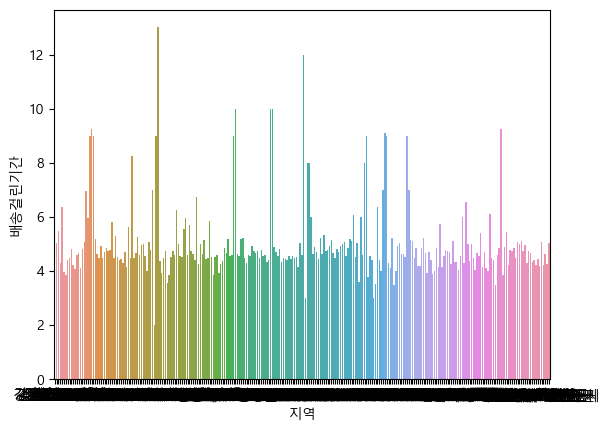

In [40]:
sns.barplot(data=dt1_days, x='지역', y='배송걸린기간')

In [41]:
dt1_days['지역']

0        강원 강릉시
1       강원도 강릉시
2       강원도 고성군
3       강원도 동해시
4       강원도 삼척시
         ...   
264    충청북도 제천시
265    충청북도 증평군
266    충청북도 진천군
267    충청북도 청주시
268    충청북도 충주시
Name: 지역, Length: 269, dtype: object

In [42]:
dt1_deli_late=dt1_days.sort_values(by = '배송걸린기간', ascending=False).head(20)
dt1_ready_late=dt1_days.sort_values(by = '재고준비기간', ascending=False).head(5)

<AxesSubplot: xlabel='지역', ylabel='배송걸린기간'>

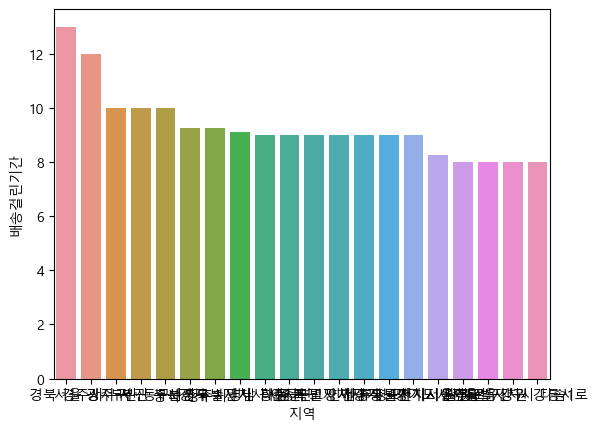

In [43]:
sns.barplot(data = dt1_deli_late, x = '지역', y = '배송걸린기간')


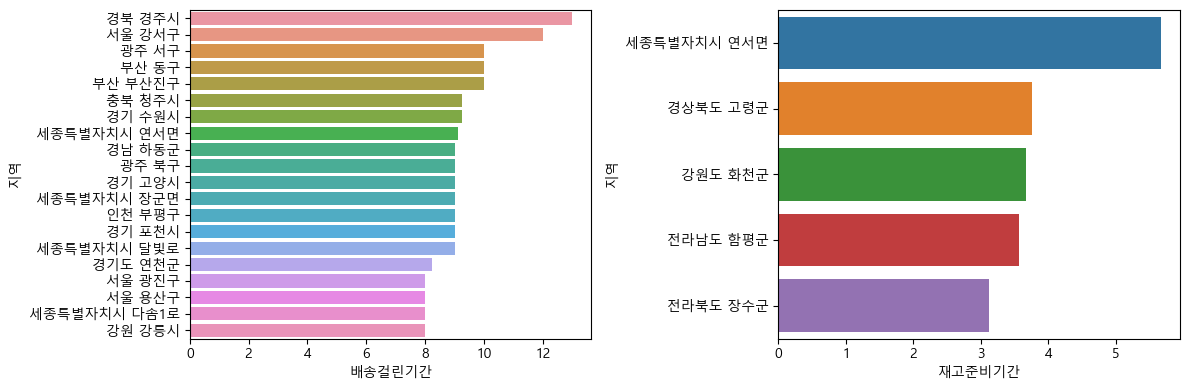

In [44]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.barplot(data = dt1_deli_late, x = '배송걸린기간', y = '지역', ax = ax1)
sns.barplot(data = dt1_ready_late, x = '재고준비기간', y = '지역', ax = ax2)
fig.tight_layout()

In [45]:
dt1_days['cnt'].sum()

46741

In [46]:
dt1_days['지역'] = dt1['지역'].replace('충북','충청북도').replace('경기','경기도').replace('광주','광주광역시').replace('서울','서울특별시').replace('경남','경상남도').replace('강원','강원도').replace('인천','인천광역시').replace('부산','부산광역시').replace('경북','경상북도')

In [47]:
dt1_late = dt1_days[dt1_days['배송걸린기간'] > 5]
dt1_late.sort_values(by='cnt', ascending=False)

지역     배송걸린기간       택배배송    재고준비기간  cnt
67     경상남도 김해시   5.009009   3.121622  1.887387  444
1    서울특별시 동대문구   5.041096   3.263014  1.778082  365
33     경상남도 김해시   5.306502   3.826625  1.479876  323
268    전라북도 군산시   5.038062   3.173010  1.865052  289
144  부산광역시 부산진구   5.213992   3.193416  2.020576  243
..          ...        ...        ...       ...  ...
56     경상남도 창원시  13.000000  12.000000  1.000000    1
55     경상남도 창원시   9.000000   8.000000  1.000000    1
53    부산광역시 연제구   7.000000   5.000000  2.000000    1
21     충청남도 공주시   9.000000   8.000000  1.000000    1
135     강원도 춘천시  12.000000  11.000000  1.000000    1

[75 rows x 5 columns]

In [48]:
dt1_map2 = dt1_late.rename(columns={'지역' : 'CTP_KOR_NM'})

In [49]:
dt1_map2['CTP_KOR_NM'] = dt1_map2['CTP_KOR_NM'].apply(lambda x: x.split(' ')[0])

In [50]:
dt1_days.sort_values(by='cnt', ascending=False)

지역    배송걸린기간      택배배송    재고준비기간   cnt
34    전라북도 군산시  4.530558  3.294951  1.235607  1129
69     강원도 강릉시  4.510295  3.069830  1.440466  1117
60    전라북도 부안군  4.748603  3.141899  1.606704   895
57     경기도 수원시  4.363636  3.030682  1.332955   880
44   서울특별시 은평구  4.681648  3.237203  1.444444   801
..         ...       ...       ...       ...   ...
168  대전광역시 대덕구  8.000000  7.000000  1.000000     1
173   충청북도 증평군  3.000000  3.000000  0.000000     1
191   경상남도 양산시  9.000000  9.000000  0.000000     1
192   경상남도 창원시  7.000000  7.000000  0.000000     1
0     경상남도 거제시  8.000000  8.000000  0.000000     1

[269 rows x 5 columns]

### 나이대 별 유입경로

In [51]:
def Age_MP(x):
    if 10<= x <20:
        return "10대"
    if 20<= x <30:
        return "20대"
    if 30<= x <40:
        return "30대"
    if 40<= x <50:
        return "40대"
    if 50<= x <60:
        return "50대"
    if 60<= x:
        return "60대 이상"

dt2['나이대'] = dt2['나이'].apply(Age_MP)
dt2['나이대'] = dt2['나이대'].astype(str)

In [52]:
dt2_age2 = dt2.groupby(['나이대','유입경로'], as_index = False).agg(count = ('나이대', 'count'))
dt2_age2

나이대     유입경로  count
0      20대       기타     17
1      20대    유튜브광고    260
2      20대    이메일광고    162
3      20대    인터넷검색     12
4      20대     잡지광고     39
5      20대    전단지광고     49
6      20대     지인추천     23
7      20대   카카오톡광고     76
8      30대    SNS광고     43
9      30대       기타     39
10     30대     신문광고     28
11     30대    유튜브광고    595
12     30대    이메일광고    449
13     30대    인터넷검색     44
14     30대  인터넷기사광고      8
15     30대     잡지광고     63
16     30대    전단지광고    145
17     30대     지인추천     54
18     30대   카카오톡광고    106
19     40대    SNS광고   1055
20     40대       기타    203
21     40대    블로그광고   1009
22     40대    유튜브광고     89
23     40대    인터넷검색    356
24     40대  인터넷기사광고    124
25     40대     잡지광고    376
26     40대    전단지광고    650
27     40대     지인추천    279
28     50대       기타      8
29     50대    블로그광고     78
30     50대    인터넷검색      6
31     50대  인터넷기사광고     10
32     50대     잡지광고     18
33     50대    전단지광고     13
34     50대     지인추천     19
35  60대 이상       기타      2
36  60대 이상     신문광고     16
37  60대 이상    인터넷검색      5
38  60대 이상  인터넷기사광고     19
39  60대 이상     잡지광고      9
40  60대 이상    전단지광고      4
41  60대 이상     지인추천     15

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '기타'),
  Text(1, 0, '유튜브광고'),
  Text(2, 0, '이메일광고'),
  Text(3, 0, '인터넷검색'),
  Text(4, 0, '잡지광고'),
  Text(5, 0, '전단지광고'),
  Text(6, 0, '지인추천'),
  Text(7, 0, '카카오톡광고'),
  Text(8, 0, 'SNS광고'),
  Text(9, 0, '신문광고'),
  Text(10, 0, '인터넷기사광고'),
  Text(11, 0, '블로그광고')])

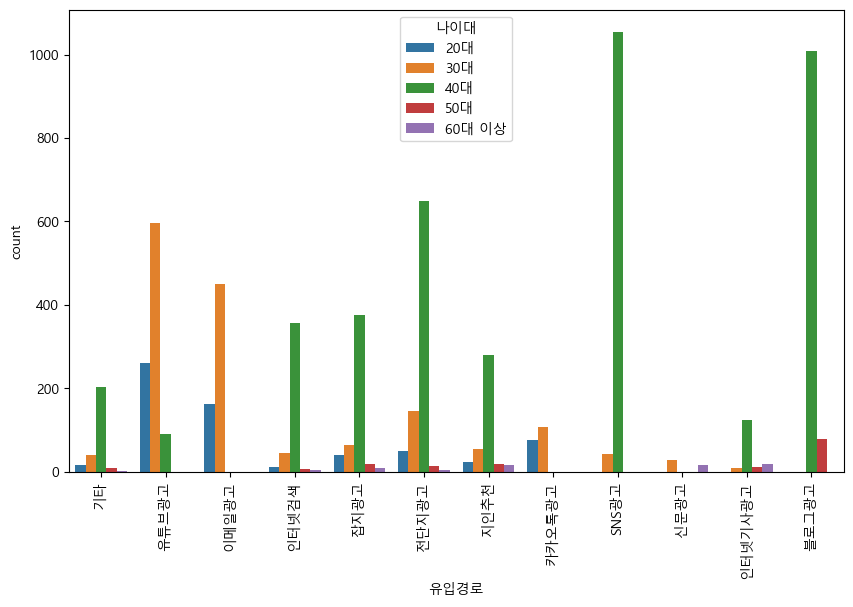

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(data=dt2_age2, x='유입경로', y='count', hue='나이대')
plt.xticks(rotation=90)

In [54]:
dt.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', 'ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일',
       '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분'],
      dtype='object')

In [55]:
dt['주문일시'] = dt['주문일시'].apply(lambda x:x.replace('오전', 'AM').replace('오후','PM'))

In [56]:
dt['주문날짜'] = pd.to_datetime(dt['주문일시'], format='%Y-%m-%d %p %I:%M')

In [57]:
dt['주문날짜'] = dt['주문날짜'].astype('str')
dt['주문날짜'] = dt['주문날짜'].apply(lambda x: x.split(' ')[0])

In [58]:
dt['주문날짜'] = dt['주문날짜'].astype('str')
dt['주문날짜'].apply(lambda x: x[:7])
dt['주문월'] = dt['주문날짜'].apply(lambda x: x[:7])

In [59]:
dt['주문월']

0        2018-12
1        2018-12
2        2018-12
3        2018-12
4        2018-12
          ...   
46744    2017-12
46745    2017-12
46746    2017-12
46747    2017-12
46748    2017-12
Name: 주문월, Length: 46749, dtype: object

### 상, 하반기 / 연도 별 매출액

In [60]:
dt['주문_반기'] = dt['주문월'].apply(lambda x: x[5:7])
dt['주문_반기'] = dt['주문_반기'].astype('int')

In [61]:
dt['주문년도'] = dt['주문월'].apply(lambda x: x[:4])

In [62]:
dt['주문년도'] = dt['주문년도'].astype('category')

In [63]:
dt['주문_반기'] = dt['주문_반기'].apply(lambda x: '상반기' if x < 7 else '하반기')

In [64]:
dt['주문_반기'] = dt['주문_반기'].astype('category')

In [65]:
dt['주문_반기']

0        하반기
1        하반기
2        하반기
3        하반기
4        하반기
        ... 
46744    하반기
46745    하반기
46746    하반기
46747    하반기
46748    하반기
Name: 주문_반기, Length: 46749, dtype: category
Categories (2, object): ['상반기', '하반기']

In [66]:
dt['주문년도'] = dt['주문년도'].astype('int')


In [67]:
dt['주문년도'].unique()

array([2018, 2019, 2017])

In [68]:
dt_half=dt.groupby(['주문년도','주문_반기'], as_index=False)[['상품구매금액']].sum()
dt_half

주문년도 주문_반기      상품구매금액
0  2017   상반기    25484870
1  2017   하반기    82542430
2  2018   상반기   480740589
3  2018   하반기  1240073236
4  2019   상반기  1414050260
5  2019   하반기           0

<AxesSubplot: xlabel='주문년도', ylabel='상품구매금액'>

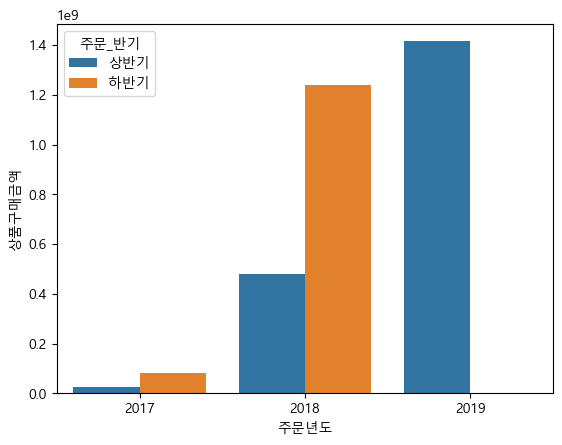

In [69]:
sns.barplot(data=dt_half, x = '주문년도', y = '상품구매금액', hue = '주문_반기')

<AxesSubplot: xlabel='주문년도', ylabel='상품구매금액'>

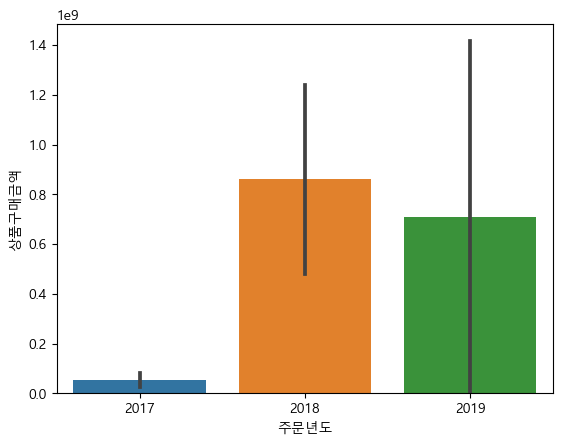

In [70]:
sns.barplot(dt_half, x = '주문년도', y = '상품구매금액')

In [71]:
plt.figure(figsize=(5,5))
px.bar(dt_half, x = '주문년도', y = '상품구매금액')

<Figure size 500x500 with 0 Axes>

### 나이대, 주문 월 별 매출액

In [72]:
def Age_MP(x):
    if 10<= x <20:
        return "10대"
    if 20<= x <30:
        return "20대"
    if 30<= x <40:
        return "30대"
    if 40<= x <50:
        return "40대"
    if 50<= x <60:
        return "50대"
    if 60<= x:
        return "60대 이상"


dt['나이대'] = dt['나이'].apply(Age_MP)
dt['나이대'] = dt['나이대'].astype(str)

In [73]:
dt.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', 'ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일',
       '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분', '주문날짜', '주문월', '주문_반기',
       '주문년도', '나이대'],
      dtype='object')

In [74]:
dt_ages_price = dt.groupby(['나이대','주문월'])[['상품구매금액']].median().reset_index()

In [75]:
dt_ages_price['주문월'] = pd.to_datetime(dt_ages_price['주문월'], format='%Y-%m')

<AxesSubplot: xlabel='주문월', ylabel='상품구매금액'>

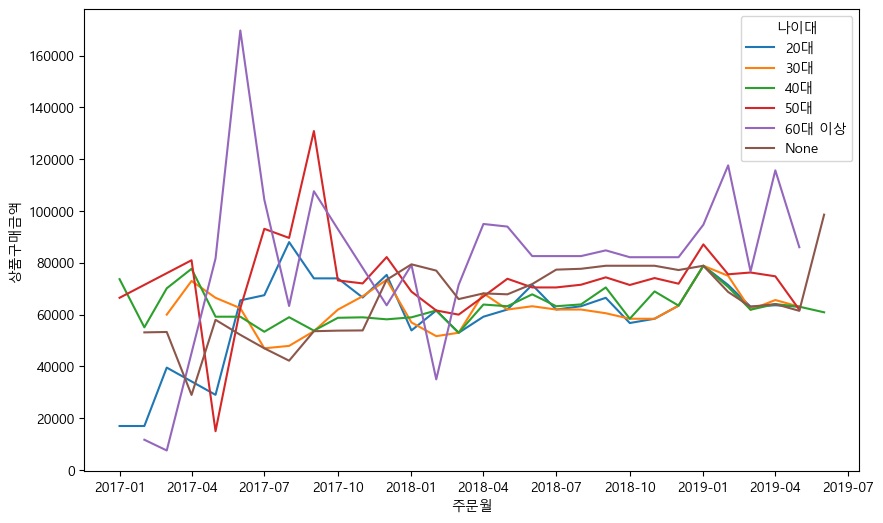

In [76]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dt_ages_price, x='주문월',y='상품구매금액',hue='나이대')

In [77]:
dt_ages_price['주문월']

0     2017-01-01
1     2017-02-01
2     2017-03-01
3     2017-05-01
4     2017-06-01
         ...    
162   2019-02-01
163   2019-03-01
164   2019-04-01
165   2019-05-01
166   2019-06-01
Name: 주문월, Length: 167, dtype: datetime64[ns]

In [78]:
dt_sum=dt.groupby(['나이대','주문월'])[['상품구매금액']].sum().reset_index()

In [79]:
px.bar(dt_sum, x='주문월',y='상품구매금액')

In [80]:
px.line(dt_sum, x='주문월',y='상품구매금액',color='나이대')

### 주문 월 별 나이대 매출금액 스택바 그래프 / 주문 월 별 나이대 주문수 스택바 그래프

In [81]:
dt1.columns

Index(['결제수단', '공급원가', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '배송걸린기간', '택배배송', '재고준비기간', '지역'],
      dtype='object')

In [82]:
dt1_ages = dt1.merge(dt2[['ID','나이대']], how='left', left_on='주문자ID', right_on='ID')

In [83]:
dt1_ages.columns

Index(['결제수단', '공급원가', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '배송걸린기간', '택배배송', '재고준비기간', '지역', 'ID', '나이대'],
      dtype='object')

In [84]:
dt1_ages['주문일시']

0       2018-12-27 14:54:00
1       2018-12-29 13:22:00
2       2018-12-30 15:15:00
3       2018-12-31 10:30:00
4       2018-12-31 10:43:00
                ...        
46744   2017-12-29 13:39:00
46745   2017-12-29 17:16:00
46746   2017-12-30 18:56:00
46747   2017-12-31 10:00:00
46748   2017-12-31 18:15:00
Name: 주문일시, Length: 46749, dtype: datetime64[ns]

In [85]:
dt1_ages['주문날짜'] = pd.to_datetime(dt1_ages['주문일시'], format='%Y-%m-%d %H:%M:%S')
dt1_ages['주문날짜'] = dt1_ages['주문날짜'].astype('str')
dt1_ages['주문날짜'] = dt1_ages['주문날짜'].apply(lambda x: x.split(' ')[0])


In [86]:
dt1_ages['주문날짜'] = dt1_ages['주문날짜'].astype('str')
dt1_ages['주문날짜'].apply(lambda x: x[:7])
dt1_ages['주문월'] = dt1_ages['주문날짜'].apply(lambda x: x[:7])

In [87]:
dt1_ages['주문월'] = pd.to_datetime(dt1_ages['주문월'], format='%Y-%m')

In [88]:
dt1_ages_month_price = dt1_ages.groupby(['나이대','주문월','상품구매금액'])[['ID']].count().reset_index()

In [89]:
dt1_ages_month_price

나이대        주문월  상품구매금액  ID
0        20대 2017-01-01   17000   2
1        20대 2017-02-01   17000   1
2        20대 2017-03-01   21500   1
3        20대 2017-03-01   57600   1
4        20대 2017-05-01   28210   1
...      ...        ...     ...  ..
9153  60대 이상 2019-05-01  207440   1
9154  60대 이상 2019-05-01  223800   2
9155  60대 이상 2019-05-01  262000   1
9156  60대 이상 2019-05-01  366080   2
9157  60대 이상 2019-05-01  500850   1

[9158 rows x 4 columns]

In [306]:
px.bar(dt_sum, x='주문월',y='상품구매금액',color='나이대')

In [91]:
dt1_ages_month_price.groupby('주문월',as_index=False)[['상품구매금액']].sum()

주문월    상품구매금액
0  2017-01-01    157200
1  2017-02-01    684410
2  2017-03-01   2147070
3  2017-04-01   2228900
4  2017-05-01   4779190
5  2017-06-01   5812100
6  2017-07-01   6324770
7  2017-08-01   5974890
8  2017-09-01   7986600
9  2017-10-01   7539870
10 2017-11-01   9801990
11 2017-12-01  10725840
12 2018-01-01  16317080
13 2018-02-01  13674940
14 2018-03-01  21276790
15 2018-04-01  33832130
16 2018-05-01  51996300
17 2018-06-01  47403520
18 2018-07-01  51376910
19 2018-08-01  56408670
20 2018-09-01  67886430
21 2018-10-01  54980610
22 2018-11-01  58283860
23 2018-12-01  65688120
24 2019-01-01  76989580
25 2019-02-01  75524610
26 2019-03-01  59525470
27 2019-04-01  75475590
28 2019-05-01  68216390
29 2019-06-01    329270

In [92]:
px.bar(dt1_ages_month_price, x='주문월',y='상품구매금액',color='나이대')

### 시도 별 매출액

In [93]:
dt1.columns

Index(['결제수단', '공급원가', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '배송걸린기간', '택배배송', '재고준비기간', '지역'],
      dtype='object')

In [94]:
dt1['수령인_도시'] = dt1['수령인 주소'].dropna().apply(lambda x: x.split(' ')[0])

In [95]:
dt1['수령인_도시'].unique()

array(['경상남도', '서울특별시', '세종특별자치시', '부산광역시', '대구광역시', '경상북도', '충청남도',
       '전라남도', '경기도', '전라북도', '충청북도', '강원도', '울산광역시', '광주광역시', '인천광역시',
       '대전광역시', '제주특별자치도', '경기', '충북', '광주', nan, '경남', '서울', '강원', '인천',
       '부산', '경북'], dtype=object)

In [96]:
dt1['수령인_도시'] = dt1['수령인_도시'].replace('충북','충청북도').replace('경기','경기도').replace('광주','광주광역시').replace('서울','서울특별시').replace('경남','경상남도').replace('강원','강원도').replace('인천','인천광역시').replace('부산','부산광역시').replace('경북','경상북도')

In [97]:
dt1_city_price = dt1.groupby('수령인_도시', as_index=False)[['상품구매금액']].sum().sort_values(by='상품구매금액', ascending=False)
dt1_city_price

수령인_도시     상품구매금액
1       경기도  598411720
8     서울특별시  393960350
7     부산광역시  362212910
2      경상남도  335409590
3      경상북도  216292860
5     대구광역시  169127210
0       강원도  140567400
15     충청남도  137290230
16     충청북도  137189190
13     전라북도  132597800
6     대전광역시  128311830
11    인천광역시  117030805
12     전라남도  109002910
4     광주광역시  103333210
10    울산광역시   99868840
14  제주특별자치도   41441700
9   세종특별자치시   20355490

<AxesSubplot: xlabel='상품구매금액', ylabel='수령인_도시'>

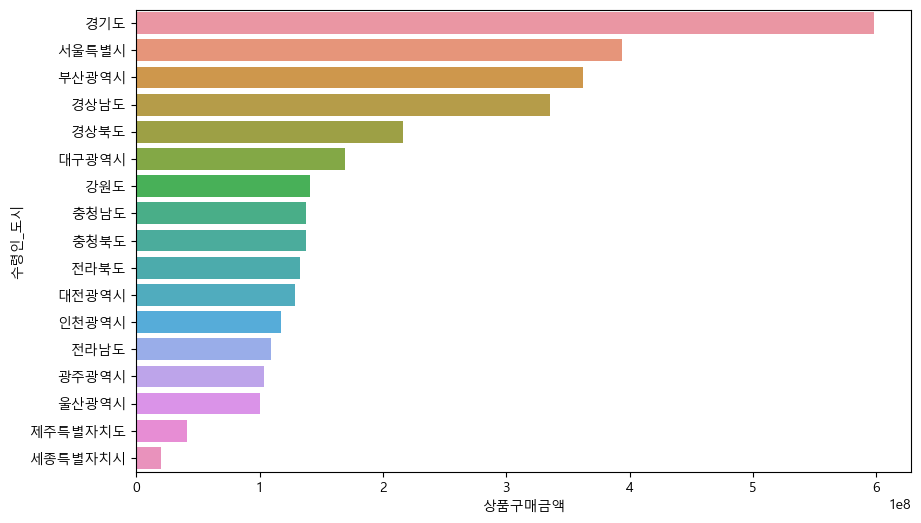

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(data=dt1_city_price, x = '상품구매금액', y = '수령인_도시')

### 시도 별 매출액 지도그래프

In [99]:
import os 
import json

In [100]:
root_path = os.getcwd() # 실행 코드가 있는 곳 
data_path = os.path.join(root_path, 'data') # 실험에 쓰일 데이터가 있는 곳 
os.chdir(data_path)

In [101]:
geometry_gj = json.load(open('kor_city.geojson', encoding='utf-8'))

In [102]:
dt1_map = dt1_city_price.copy()

In [103]:
dt1_map = dt1_map.rename(columns={'수령인_도시' : 'CTP_KOR_NM'})

In [104]:
dt1_map

CTP_KOR_NM     상품구매금액
1         경기도  598411720
8       서울특별시  393960350
7       부산광역시  362212910
2        경상남도  335409590
3        경상북도  216292860
5       대구광역시  169127210
0         강원도  140567400
15       충청남도  137290230
16       충청북도  137189190
13       전라북도  132597800
6       대전광역시  128311830
11      인천광역시  117030805
12       전라남도  109002910
4       광주광역시  103333210
10      울산광역시   99868840
14    제주특별자치도   41441700
9     세종특별자치시   20355490

In [105]:
geometry_gj

{'type': 'FeatureCollection',
 'bbox': [124.7893155286271,
  33.172610584346295,
  130.96524575425667,
  38.54255349620522],
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[128.54880989370014, 38.301950820518755],
      [128.5600921732829, 38.25735515107489],
      [128.59761716763322, 38.21480959198724],
      [128.60765942875406, 38.15215810015938],
      [128.64206854447866, 38.106588627599855],
      [128.66939445927846, 38.08634208760778],
      [128.69458333244307, 38.0453480455091],
      [128.73326744935343, 38.01787054352603],
      [128.79463671088126, 37.92801060958252],
      [128.8233689458956, 37.90753318801803],
      [128.83001997197184, 37.88458455426084],
      [128.8786226699225, 37.8294251483049],
      [128.9852771172376, 37.74045442473868],
      [129.01482411622038, 37.70600771921262],
      [129.05505018456222, 37.675224044111836],
      [129.04353313092116, 37.642745963305245],
      [129.05392180246835, 37.62123228307

In [106]:
fig = px.choropleth(dt1_map, geojson=geometry_gj, locations='CTP_KOR_NM', color = '상품구매금액', color_continuous_scale='Blues',featureidkey='properties.CTP_KOR_NM')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='도시별 구매액', title_font_size=20)
fig.update_layout(
        autosize=False,
        margin = dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=4,
                autoexpand=True
            ),
            width=800,
             height=400,
    )

In [107]:
dt1_map2.rename(columns={'cnt':'배송지연'}, inplace=True)

In [108]:
fig = px.choropleth(dt1_map2, geojson=geometry_gj, locations='CTP_KOR_NM', color = '배송지연', color_continuous_scale='Greens',featureidkey='properties.CTP_KOR_NM')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='도시별 배송지연', title_font_size=20)
fig.update_layout(
        autosize=False,
     
    )

### 경기도 매출 순위 그래프

In [110]:
dt1['수령인_도시'].unique()

array(['경상남도', '서울특별시', '세종특별자치시', '부산광역시', '대구광역시', '경상북도', '충청남도',
       '전라남도', '경기도', '전라북도', '충청북도', '강원도', '울산광역시', '광주광역시', '인천광역시',
       '대전광역시', '제주특별자치도', nan], dtype=object)

In [111]:
dt1['지역'] = dt1['지역'].replace('경기 수원시', '경기도 수원시').replace('경기 포천시', '경기도 포천시').replace('경기 고양시', '경기도 고양시')

In [112]:
dt1_gyeonggi=dt1[dt1['수령인_도시'].str.contains('경기도', na=False)]

In [113]:
dt1_gyeonggi_price = dt1_gyeonggi.groupby('지역', as_index=False)[['상품구매금액']].sum().sort_values(by='상품구매금액', ascending=False)

<AxesSubplot: xlabel='상품구매금액', ylabel='지역'>

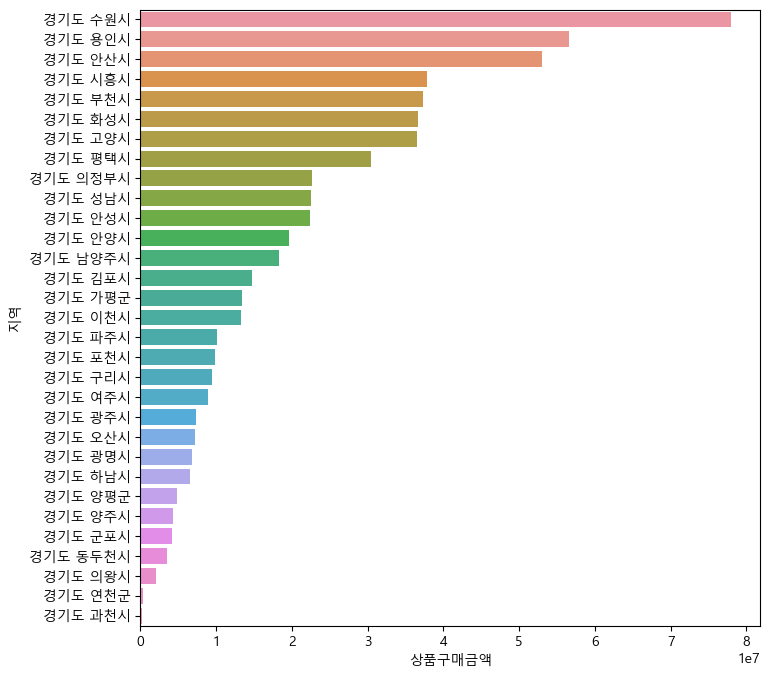

In [114]:
plt.figure(figsize=(8,8))
sns.barplot(data=dt1_gyeonggi_price, x='상품구매금액',y='지역')

In [115]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        46749 non-null  object        
 1   공급원가        46661 non-null  float64       
 2   네이버 포인트     46749 non-null  int64         
 3   배송번호        46749 non-null  object        
 4   배송비 정보      46749 non-null  object        
 5   배송시작일       46749 non-null  datetime64[ns]
 6   배송완료일       46749 non-null  datetime64[ns]
 7   사용한 적립금액    46749 non-null  int64         
 8   상품구매금액      46749 non-null  int64         
 9   상품명         46661 non-null  object        
 10  상품번호        46661 non-null  float64       
 11  상품별 추가할인금액  46749 non-null  int64         
 12  수량          46749 non-null  int64         
 13  수령인 주소      46741 non-null  object        
 14  주문 시 회원등급   43644 non-null  object        
 15  주문경로        46749 non-null  object        
 16  주문번호        46749 non-

In [116]:
dt1['주문날짜'] = pd.to_datetime(dt1['주문일시'], format='%Y-%m-%d %H:%M:%S')
dt1['주문날짜'] = dt1['주문날짜'].astype('str')
dt1['주문날짜'] = dt1['주문날짜'].apply(lambda x: x.split(' ')[0])

In [117]:
dt1['주문날짜'] = pd.to_datetime(dt1['주문날짜'], format='%Y-%m-%d')

In [118]:
dt1.head()

결제수단     공급원가  네이버 포인트                   배송번호 배송비 정보               배송시작일  \
0  무통장입금  44550.0        0  D-20181227-0000648-00     무료 2019-01-07 08:56:00   
1  무통장입금  44000.0        0  D-20181229-0000119-00     무료 2019-01-03 09:30:00   
2  무통장입금   6820.0        0  D-20181230-0000100-00     무료 2019-01-03 09:30:00   
3  무통장입금  49500.0        0  D-20181231-0000087-00     무료 2019-01-03 09:30:00   
4  무통장입금  61600.0        0  D-20181231-0000108-00     무료 2019-01-07 08:56:00   

                배송완료일  사용한 적립금액  상품구매금액  \
0 2019-01-11 05:32:00         0   71450   
1 2019-01-07 05:32:00         0  141240   
2 2019-01-07 05:32:00         0   13910   
3 2019-01-07 05:32:00         0   81600   
4 2019-01-11 05:32:00         0   94710   

                                              상품명  ...  카드사  쿠폰 할인금액    판매가  \
0                      195파이 탕용기 소 300개 1set(2박스)  ...  NaN        0  71450   
1  95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)  ...  NaN        0  70620   
2                              비닐봉투 배달중 중 백색 200개  ...  NaN        0  13910   
3                   195파이 미니탕용기 투톤 300개 1set(2박스)  ...  NaN        0  81600   
4                      250파이 원형 접시 미니 블랙 400개 1박스  ...  NaN        0  94710   

    품목번호 배송걸린기간 택배배송 재고준비기간            지역   수령인_도시       주문날짜  
0  42602     14    3     11      경상남도 거제시     경상남도 2018-12-27  
1  42930      8    3      5    서울특별시 동대문구    서울특별시 2018-12-29  
2  42998      7    3      4  세종특별자치시 호려울로  세종특별자치시 2018-12-30  
3  43063      6    3      3    부산광역시 부산진구    부산광역시 2018-12-31  
4  43066     10    3      7    부산광역시 해운대구    부산광역시 2018-12-31  

[5 rows x 29 columns]

### 재구매기간 예측모델

In [119]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        46749 non-null  object        
 1   공급원가        46661 non-null  float64       
 2   네이버 포인트     46749 non-null  int64         
 3   배송번호        46749 non-null  object        
 4   배송비 정보      46749 non-null  object        
 5   배송시작일       46749 non-null  datetime64[ns]
 6   배송완료일       46749 non-null  datetime64[ns]
 7   사용한 적립금액    46749 non-null  int64         
 8   상품구매금액      46749 non-null  int64         
 9   상품명         46661 non-null  object        
 10  상품번호        46661 non-null  float64       
 11  상품별 추가할인금액  46749 non-null  int64         
 12  수량          46749 non-null  int64         
 13  수령인 주소      46741 non-null  object        
 14  주문 시 회원등급   43644 non-null  object        
 15  주문경로        46749 non-null  object        
 16  주문번호        46749 non-

In [120]:
join_data = dt1.merge(dt2, left_on = '주문자ID', right_on='ID' ,how = 'left')

In [121]:
join_find=join_data.groupby(['주문자ID', '주문일시'], as_index=False)[['결제수단']].count()
join_find=join_find[join_find['결제수단'] > 2]
join_find.sort_values(by='주문일시', ascending=False)
join_find

주문자ID                주문일시  결제수단
1      1003409866@k 2019-01-07 20:34:00     4
5      1003409866@k 2019-02-11 10:45:00     3
7      1003409866@k 2019-02-26 10:27:00     3
8      1003409866@k 2019-03-05 15:16:00     5
17     1003409866@k 2019-05-01 21:29:00     3
...             ...                 ...   ...
21320       zlxm777 2019-04-17 17:31:00     3
21326    zuingong73 2018-10-22 16:06:00     3
21333        zxxz60 2019-05-07 15:09:00     5
21356       zzbbwmf 2018-10-17 17:07:00     5
21363     zzzxkxk91 2018-01-03 14:00:00     3

[5100 rows x 3 columns]

In [122]:
dt1_find=dt1.groupby(['주문자ID', '주문일시'], as_index=False)[['결제수단']].count()
dt1_find=dt1_find[dt1_find['결제수단'] > 2]
dt1_find.sort_values(by='주문일시', ascending=False)
dt1_find

주문자ID                주문일시  결제수단
1      1003409866@k 2019-01-07 20:34:00     4
5      1003409866@k 2019-02-11 10:45:00     3
7      1003409866@k 2019-02-26 10:27:00     3
8      1003409866@k 2019-03-05 15:16:00     5
17     1003409866@k 2019-05-01 21:29:00     3
...             ...                 ...   ...
21320       zlxm777 2019-04-17 17:31:00     3
21326    zuingong73 2018-10-22 16:06:00     3
21333        zxxz60 2019-05-07 15:09:00     5
21356       zzbbwmf 2018-10-17 17:07:00     5
21363     zzzxkxk91 2018-01-03 14:00:00     3

[5100 rows x 3 columns]

In [123]:
dt1_find['주문일시'].iloc[1] - dt1_find['주문일시'].iloc[0]

Timedelta('34 days 14:11:00')

In [124]:
join_id_days = join_data.groupby('주문자ID', as_index=False)[['주문일시']].count().sort_values(by='주문일시', ascending=False)

In [125]:
dt1_id_days = dt1_find.groupby('주문자ID', as_index=False)[['주문일시']].count().sort_values(by='주문일시', ascending=False)
dt1_id_days[dt1_id_days['주문일시'] > 1]

주문자ID  주문일시
1355         pp257    49
229    776646558@k    48
893    mission1013    41
72      20754614@n    37
821     leemansome    36
...            ...   ...
1253        pp1560     2
1255        pp1565     2
1028         pp057     2
290   a01053972651     2
578       hans1778     2

[796 rows x 2 columns]

In [126]:
dt1_find.iloc[0, 0] == dt1_find.iloc[1, 0]

True

In [127]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        46749 non-null  object        
 1   공급원가        46661 non-null  float64       
 2   네이버 포인트     46749 non-null  int64         
 3   배송번호        46749 non-null  object        
 4   배송비 정보      46749 non-null  object        
 5   배송시작일       46749 non-null  datetime64[ns]
 6   배송완료일       46749 non-null  datetime64[ns]
 7   사용한 적립금액    46749 non-null  int64         
 8   상품구매금액      46749 non-null  int64         
 9   상품명         46661 non-null  object        
 10  상품번호        46661 non-null  float64       
 11  상품별 추가할인금액  46749 non-null  int64         
 12  수량          46749 non-null  int64         
 13  수령인 주소      46741 non-null  object        
 14  주문 시 회원등급   43644 non-null  object        
 15  주문경로        46749 non-null  object        
 16  주문번호        46749 non-

In [128]:
dt1_find['주문일시']

1       2019-01-07 20:34:00
5       2019-02-11 10:45:00
7       2019-02-26 10:27:00
8       2019-03-05 15:16:00
17      2019-05-01 21:29:00
                ...        
21320   2019-04-17 17:31:00
21326   2018-10-22 16:06:00
21333   2019-05-07 15:09:00
21356   2018-10-17 17:07:00
21363   2018-01-03 14:00:00
Name: 주문일시, Length: 5100, dtype: datetime64[ns]

In [129]:
join_find=join_find.sort_values(by='주문자ID')
join_find['주문일시'] = join_find['주문일시'].dt.strftime('%Y-%m-%d')

In [130]:
dt1_find=dt1_find.sort_values(by='주문자ID')
dt1_find['주문일시'] = dt1_find['주문일시'].dt.strftime('%Y-%m-%d')

In [131]:
join_find['주문일시'] = pd.to_datetime(join_find['주문일시'], format='%Y-%m-%d')
join_find['주문일시']=join_find['주문일시'].sort_values()
join_find

주문자ID       주문일시  결제수단
1      1003409866@k 2019-01-07     4
5      1003409866@k 2019-02-11     3
7      1003409866@k 2019-02-26     3
8      1003409866@k 2019-03-05     5
17     1003409866@k 2019-05-01     3
...             ...        ...   ...
21320       zlxm777 2019-04-17     3
21326    zuingong73 2018-10-22     3
21333        zxxz60 2019-05-07     5
21356       zzbbwmf 2018-10-17     5
21363     zzzxkxk91 2018-01-03     3

[5100 rows x 3 columns]

In [132]:
dt1_find['주문일시'] = pd.to_datetime(dt1_find['주문일시'], format='%Y-%m-%d')
dt1_find['주문일시']=dt1_find['주문일시'].sort_values()
dt1_find

주문자ID       주문일시  결제수단
1      1003409866@k 2019-01-07     4
5      1003409866@k 2019-02-11     3
7      1003409866@k 2019-02-26     3
8      1003409866@k 2019-03-05     5
17     1003409866@k 2019-05-01     3
...             ...        ...   ...
21320       zlxm777 2019-04-17     3
21326    zuingong73 2018-10-22     3
21333        zxxz60 2019-05-07     5
21356       zzbbwmf 2018-10-17     5
21363     zzzxkxk91 2018-01-03     3

[5100 rows x 3 columns]

In [133]:
join_remove = join_find.groupby('주문자ID', as_index=False)[['주문일시']].count()
join_remove=join_remove[join_remove['주문일시'] > 1]
join_remove=join_remove.sort_values(by = '주문자ID')
join_remove = join_remove.reset_index()
join_remove

index         주문자ID  주문일시
0        0  1003409866@k     6
1        4    10320819@n     5
2       12   109319048@n     3
3       13   111681891@n     2
4       14   112549561@n     2
..     ...           ...   ...
791   2051       ywg9669     2
792   2055        zagm10    18
793   2056      zasm2925     2
794   2057       zhuiqiu     2
795   2060       zlxm777     9

[796 rows x 3 columns]

In [134]:
dt1_remove = dt1_find.groupby('주문자ID', as_index=False)[['주문일시']].count()
dt1_remove=dt1_remove[dt1_remove['주문일시'] > 1]
dt1_remove=dt1_remove.sort_values(by = '주문자ID')
dt1_remove = dt1_remove.reset_index()
dt1_remove

index         주문자ID  주문일시
0        0  1003409866@k     6
1        4    10320819@n     5
2       12   109319048@n     3
3       13   111681891@n     2
4       14   112549561@n     2
..     ...           ...   ...
791   2051       ywg9669     2
792   2055        zagm10    18
793   2056      zasm2925     2
794   2057       zhuiqiu     2
795   2060       zlxm777     9

[796 rows x 3 columns]

In [135]:
n = 0
list3 = list()
list4 = list()

while True:
    
    if join_find.iloc[n, 0] == join_find.iloc[n+1, 0]:
        list4.append(join_find['주문일시'].iloc[n+1] - join_find['주문일시'].iloc[n])
        n += 1
        continue
    
    elif join_find.iloc[n, 0] != join_find.iloc[n+1, 0]:
        list3.append(list4)
        list4 = list()
    
    

    if n == len(join_find)-2:
        break

    n += 1

In [136]:
n = 0
list1 = list()
list2 = list()

while True:
    
    if dt1_find.iloc[n, 0] == dt1_find.iloc[n+1, 0]:
        list2.append(dt1_find['주문일시'].iloc[n+1] - dt1_find['주문일시'].iloc[n])
        n += 1
        continue
    
    elif dt1_find.iloc[n, 0] != dt1_find.iloc[n+1, 0]:
        list1.append(list2)
        list2 = list()
    
    

    if n == len(dt1_find)-2:
        break

    n += 1

In [137]:
list1 = list(filter(None, list1))
len(list1)

796

In [138]:
list3 = list(filter(None, list3))

In [139]:
list1

[[Timedelta('35 days 00:00:00'),
  Timedelta('15 days 00:00:00'),
  Timedelta('7 days 00:00:00'),
  Timedelta('57 days 00:00:00'),
  Timedelta('27 days 00:00:00')],
 [Timedelta('-35 days +00:00:00'),
  Timedelta('-62 days +00:00:00'),
  Timedelta('-161 days +00:00:00'),
  Timedelta('174 days 00:00:00')],
 [Timedelta('-363 days +00:00:00'), Timedelta('188 days 00:00:00')],
 [Timedelta('187 days 00:00:00')],
 [Timedelta('165 days 00:00:00')],
 [Timedelta('-72 days +00:00:00')],
 [Timedelta('-453 days +00:00:00'), Timedelta('180 days 00:00:00')],
 [Timedelta('128 days 00:00:00'),
  Timedelta('62 days 00:00:00'),
  Timedelta('127 days 00:00:00')],
 [Timedelta('13 days 00:00:00'),
  Timedelta('21 days 00:00:00'),
  Timedelta('23 days 00:00:00'),
  Timedelta('16 days 00:00:00'),
  Timedelta('23 days 00:00:00')],
 [Timedelta('-314 days +00:00:00')],
 [Timedelta('7 days 00:00:00'),
  Timedelta('14 days 00:00:00'),
  Timedelta('6 days 00:00:00'),
  Timedelta('8 days 00:00:00'),
  Timedelta('12 

In [140]:
list1[0][0] + list1[0][1]

Timedelta('50 days 00:00:00')

In [141]:
len(list1[0])

5

In [142]:
n = 0
a = 0
len_lists = []

while True:

    a = len(list3[n])
    len_lists.append(a)

    if n == len(list3)-1:
        break

    n += 1

In [143]:
n = 0
a = 0
len_list = []

while True:

    a = len(list1[n])
    len_list.append(a)

    if n == len(list1)-1:
        break

    n += 1

In [144]:
from datetime import timedelta

In [145]:
n = timedelta(days=0)
days_mean = []

for i in range(len(list1)):
    for j in range(len(list1[i])):
        n += list1[i][j]
    days_mean.append(n)
    n = timedelta(days=0)

In [146]:
n = timedelta(days=0)
days_means = []

for i in range(len(list3)):
    for j in range(len(list3[i])):
        n += list1[i][j]
    days_means.append(n)
    n = timedelta(days=0)

In [147]:
len(days_mean)

796

In [148]:
sum_days = pd.DataFrame(data = days_mean)

In [149]:
sum_day = pd.DataFrame(data = days_means)

In [150]:
sum_days.columns = ['days']

In [151]:
sum_day.columns = ['days']

In [152]:
sum_days['days'] = sum_days['days'].abs()
sum_days['주문자ID'] = dt1_remove['주문자ID']
sum_days

days         주문자ID
0   141 days  1003409866@k
1    84 days    10320819@n
2   175 days   109319048@n
3   187 days   111681891@n
4   165 days   112549561@n
..       ...           ...
791 193 days       ywg9669
792 132 days        zagm10
793 349 days      zasm2925
794  46 days       zhuiqiu
795 286 days       zlxm777

[796 rows x 2 columns]

In [153]:
sum_day['days'] = sum_day['days'].abs()
sum_day['주문자ID'] = join_remove['주문자ID']
sum_day

days         주문자ID
0   141 days  1003409866@k
1    84 days    10320819@n
2   175 days   109319048@n
3   187 days   111681891@n
4   165 days   112549561@n
..       ...           ...
791 193 days       ywg9669
792 132 days        zagm10
793 349 days      zasm2925
794  46 days       zhuiqiu
795 286 days       zlxm777

[796 rows x 2 columns]

In [154]:
sum_days['len_id'] = len_list
sum_days

days         주문자ID  len_id
0   141 days  1003409866@k       5
1    84 days    10320819@n       4
2   175 days   109319048@n       2
3   187 days   111681891@n       1
4   165 days   112549561@n       1
..       ...           ...     ...
791 193 days       ywg9669       1
792 132 days        zagm10      17
793 349 days      zasm2925       1
794  46 days       zhuiqiu       1
795 286 days       zlxm777       8

[796 rows x 3 columns]

In [155]:
sum_day['len_id'] = len_lists
sum_day

days         주문자ID  len_id
0   141 days  1003409866@k       5
1    84 days    10320819@n       4
2   175 days   109319048@n       2
3   187 days   111681891@n       1
4   165 days   112549561@n       1
..       ...           ...     ...
791 193 days       ywg9669       1
792 132 days        zagm10      17
793 349 days      zasm2925       1
794  46 days       zhuiqiu       1
795 286 days       zlxm777       8

[796 rows x 3 columns]

In [156]:
sum_days['mean'] = sum_days['days'] / sum_days['len_id']
sum_days

days         주문자ID  len_id                      mean
0   141 days  1003409866@k       5          28 days 04:48:00
1    84 days    10320819@n       4          21 days 00:00:00
2   175 days   109319048@n       2          87 days 12:00:00
3   187 days   111681891@n       1         187 days 00:00:00
4   165 days   112549561@n       1         165 days 00:00:00
..       ...           ...     ...                       ...
791 193 days       ywg9669       1         193 days 00:00:00
792 132 days        zagm10      17 7 days 18:21:10.588235294
793 349 days      zasm2925       1         349 days 00:00:00
794  46 days       zhuiqiu       1          46 days 00:00:00
795 286 days       zlxm777       8          35 days 18:00:00

[796 rows x 4 columns]

In [157]:
sum_day['mean'] = sum_day['days'] / sum_day['len_id']
sum_day

days         주문자ID  len_id                      mean
0   141 days  1003409866@k       5          28 days 04:48:00
1    84 days    10320819@n       4          21 days 00:00:00
2   175 days   109319048@n       2          87 days 12:00:00
3   187 days   111681891@n       1         187 days 00:00:00
4   165 days   112549561@n       1         165 days 00:00:00
..       ...           ...     ...                       ...
791 193 days       ywg9669       1         193 days 00:00:00
792 132 days        zagm10      17 7 days 18:21:10.588235294
793 349 days      zasm2925       1         349 days 00:00:00
794  46 days       zhuiqiu       1          46 days 00:00:00
795 286 days       zlxm777       8          35 days 18:00:00

[796 rows x 4 columns]

In [158]:
dt_reg1 = dt1.copy()

In [159]:
dt_reg1 = dt_reg1.merge(sum_day, how='left', on='주문자ID')


In [160]:
dt_reg1 = dt_reg1[dt_reg1['mean'].notna()]
dt_reg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24481 entries, 0 to 46745
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   결제수단        24481 non-null  object         
 1   공급원가        24474 non-null  float64        
 2   네이버 포인트     24481 non-null  int64          
 3   배송번호        24481 non-null  object         
 4   배송비 정보      24481 non-null  object         
 5   배송시작일       24481 non-null  datetime64[ns] 
 6   배송완료일       24481 non-null  datetime64[ns] 
 7   사용한 적립금액    24481 non-null  int64          
 8   상품구매금액      24481 non-null  int64          
 9   상품명         24474 non-null  object         
 10  상품번호        24474 non-null  float64        
 11  상품별 추가할인금액  24481 non-null  int64          
 12  수량          24481 non-null  int64          
 13  수령인 주소      24481 non-null  object         
 14  주문 시 회원등급   24481 non-null  object         
 15  주문경로        24481 non-null  object         
 16  주문번호

In [161]:
dt_reg1 = dt_reg1.drop(['상품명','지역','배송번호','배송시작일','배송완료일','상품번호','수령인 주소','주문번호','주문일시','주문자ID','품목번호','수령인_도시','주문날짜', 'days'], axis=1)

In [162]:
dt_reg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24481 entries, 0 to 46745
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   결제수단        24481 non-null  object         
 1   공급원가        24474 non-null  float64        
 2   네이버 포인트     24481 non-null  int64          
 3   배송비 정보      24481 non-null  object         
 4   사용한 적립금액    24481 non-null  int64          
 5   상품구매금액      24481 non-null  int64          
 6   상품별 추가할인금액  24481 non-null  int64          
 7   수량          24481 non-null  int64          
 8   주문 시 회원등급   24481 non-null  object         
 9   주문경로        24481 non-null  object         
 10  카드사         7338 non-null   object         
 11  쿠폰 할인금액     24481 non-null  int64          
 12  판매가         24481 non-null  int64          
 13  배송걸린기간      24481 non-null  int32          
 14  택배배송        24481 non-null  int32          
 15  재고준비기간      24481 non-null  int32          
 16  len_

In [163]:
dt_reg1['mean'] = dt_reg1['mean'].dt.days

In [164]:
dt_reg1['배송비 정보'] = dt_reg1['배송비 정보'].astype('category')
dt_reg1['결제수단'] = dt_reg1['결제수단'].astype('category')
dt_reg1['주문 시 회원등급'] = dt_reg1['주문 시 회원등급'].astype('category')
dt_reg1['주문경로'] = dt_reg1['주문경로'].astype('category')
dt_reg1['카드사'] = dt_reg1['카드사'].astype('category')

In [165]:
dt_reg1 = dt_reg1[dt_reg1['공급원가'].notna()]

In [166]:
dt_reg1.columns

Index(['결제수단', '공급원가', '네이버 포인트', '배송비 정보', '사용한 적립금액', '상품구매금액', '상품별 추가할인금액',
       '수량', '주문 시 회원등급', '주문경로', '카드사', '쿠폰 할인금액', '판매가', '배송걸린기간', '택배배송',
       '재고준비기간', 'len_id', 'mean'],
      dtype='object')

In [167]:
dt_reg1['mean'].describe()

count    24474.000000
mean        39.715331
std         48.463149
min          0.000000
25%          9.000000
50%         24.000000
75%         52.000000
max        563.000000
Name: mean, dtype: float64

In [168]:
(43*1.5) + 52

116.5

<AxesSubplot: ylabel='mean'>

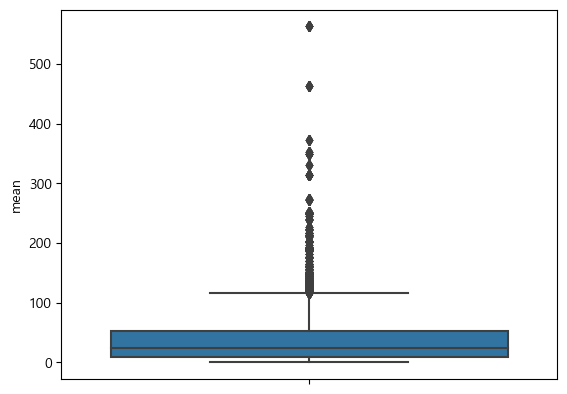

In [169]:
sns.boxplot(data=dt_reg1, y='mean')

In [170]:
dt_reg1 =dt_reg1[dt_reg1['mean'] < 96]

In [171]:
4709 / 24481

0.1923532535435644

In [172]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import numpy as np

In [173]:
dt_reg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21884 entries, 4 to 46745
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   결제수단        21884 non-null  category
 1   공급원가        21884 non-null  float64 
 2   네이버 포인트     21884 non-null  int64   
 3   배송비 정보      21884 non-null  category
 4   사용한 적립금액    21884 non-null  int64   
 5   상품구매금액      21884 non-null  int64   
 6   상품별 추가할인금액  21884 non-null  int64   
 7   수량          21884 non-null  int64   
 8   주문 시 회원등급   21884 non-null  category
 9   주문경로        21884 non-null  category
 10  카드사         6650 non-null   category
 11  쿠폰 할인금액     21884 non-null  int64   
 12  판매가         21884 non-null  int64   
 13  배송걸린기간      21884 non-null  int32   
 14  택배배송        21884 non-null  int32   
 15  재고준비기간      21884 non-null  int32   
 16  len_id      21884 non-null  float64 
 17  mean        21884 non-null  int64   
dtypes: category(5), float64(2), int32(3), int64(8)

In [174]:
corr_dt1 = dt_reg1.corr().apply(lambda x: round(x, 2))
corr_dt1

C:\Users\operation\AppData\Local\Temp\ipykernel_8\2403240017.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



공급원가  네이버 포인트  사용한 적립금액  상품구매금액  상품별 추가할인금액    수량  쿠폰 할인금액   판매가  \
공급원가        1.00      NaN      0.02    0.60        0.39  0.03     0.02  0.94   
네이버 포인트      NaN      NaN       NaN     NaN         NaN   NaN      NaN   NaN   
사용한 적립금액    0.02      NaN      1.00    0.06        0.04  0.05    -0.03  0.02   
상품구매금액      0.60      NaN      0.06    1.00        0.75  0.67     0.03  0.65   
상품별 추가할인금액  0.39      NaN      0.04    0.75        1.00  0.47     0.02  0.52   
수량          0.03      NaN      0.05    0.67        0.47  1.00     0.02  0.05   
쿠폰 할인금액     0.02      NaN     -0.03    0.03        0.02  0.02     1.00  0.03   
판매가         0.94      NaN      0.02    0.65        0.52  0.05     0.03  1.00   
배송걸린기간      0.07      NaN      0.03    0.06        0.03  0.02     0.01  0.08   
택배배송        0.01      NaN     -0.00    0.02       -0.02  0.04     0.01  0.01   
재고준비기간      0.07      NaN      0.03    0.06        0.03  0.01     0.01  0.08   
len_id      0.05      NaN      0.13    0.08        0.09  0.03     0.02  0.06   
mean       -0.03      NaN     -0.08   -0.07       -0.07 -0.05    -0.03 -0.03   

            배송걸린기간  택배배송  재고준비기간  len_id  mean  
공급원가          0.07  0.01    0.07    0.05 -0.03  
네이버 포인트        NaN   NaN     NaN     NaN   NaN  
사용한 적립금액      0.03 -0.00    0.03    0.13 -0.08  
상품구매금액        0.06  0.02    0.06    0.08 -0.07  
상품별 추가할인금액    0.03 -0.02    0.03    0.09 -0.07  
수량            0.02  0.04    0.01    0.03 -0.05  
쿠폰 할인금액       0.01  0.01    0.01    0.02 -0.03  
판매가           0.08  0.01    0.08    0.06 -0.03  
배송걸린기간        1.00  0.12    0.99   -0.05  0.02  
택배배송          0.12  1.00   -0.01   -0.00  0.00  
재고준비기간        0.99 -0.01    1.00   -0.05  0.02  
len_id       -0.05 -0.00   -0.05    1.00 -0.55  
mean          0.02  0.00    0.02   -0.55  1.00

In [175]:
dt_reg1.drop(['상품구매금액','상품별 추가할인금액','공급원가'], axis=1 ,inplace=True)
dt_reg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21884 entries, 4 to 46745
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   결제수단       21884 non-null  category
 1   네이버 포인트    21884 non-null  int64   
 2   배송비 정보     21884 non-null  category
 3   사용한 적립금액   21884 non-null  int64   
 4   수량         21884 non-null  int64   
 5   주문 시 회원등급  21884 non-null  category
 6   주문경로       21884 non-null  category
 7   카드사        6650 non-null   category
 8   쿠폰 할인금액    21884 non-null  int64   
 9   판매가        21884 non-null  int64   
 10  배송걸린기간     21884 non-null  int32   
 11  택배배송       21884 non-null  int32   
 12  재고준비기간     21884 non-null  int32   
 13  len_id     21884 non-null  float64 
 14  mean       21884 non-null  int64   
dtypes: category(5), float64(1), int32(3), int64(6)
memory usage: 1.7 MB


In [176]:
dt_reg01 = pd.get_dummies(dt_reg1.loc[:, ~dt_reg1.columns.isin(['mean'])], dummy_na=True)

In [177]:
x = dt_reg01
y = dt_reg1['mean']

In [178]:
x.columns = x.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [179]:
x_tn, x_ts, y_tn, y_ts = train_test_split(x,y,test_size=0.3)

In [180]:
# from sklearn.ensemble import RandomForestRegressor

In [181]:
# train_score=[]
# test_score=[]
# for i in range(1, 21):
#     model=RandomForestRegressor(max_depth=i, random_state=1)
#     model.fit(x_tn,y_tn)
#     train_score.append(model.score(x_tn,y_tn))
#     test_score.append(model.score(x_ts,y_ts))
# plt.figure()
# plt.title('score for depths')
# plt.plot(range(1, 21),train_score)
# plt.plot(range(1, 21),test_score)
# plt.xticks(range(1, 21))
# plt.show()

In [182]:
reg01 = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 5, colsample_bytree = 0.3, alpha = 15, n_estimators = 100)
reg01.fit(x_tn, y_tn)

pred_y = reg01.predict(x_ts)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

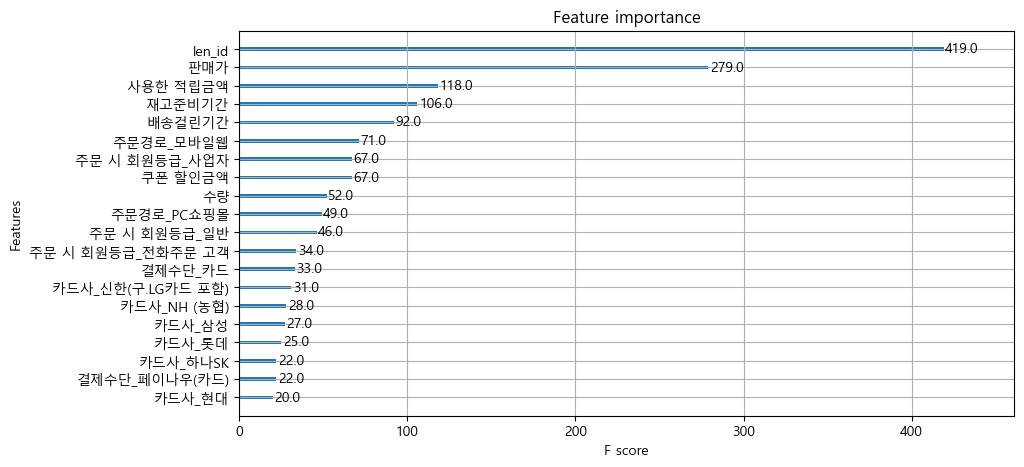

In [183]:
fig, ax = plt.subplots(figsize = (10, 5))
xgb.plot_importance(reg01, max_num_features=20, ax=ax)

<AxesSubplot: xlabel='mean'>

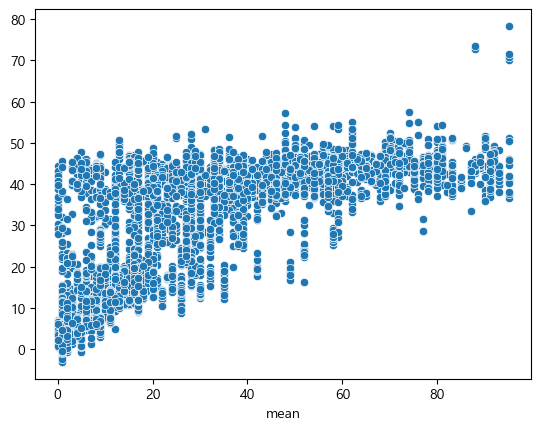

In [184]:
sns.scatterplot(x = y_ts, y = pred_y)

In [185]:
score_tn = reg01.score(x_tn, y_tn)
score_ts = reg01.score(x_ts, y_ts)

print(score_tn, score_ts)

0.5466740754686008 0.5279387500986646


In [186]:
X = x[['len_id','재고준비기간','배송걸린기간','주문 시 회원등급_전화주문 고객','주문 시 회원등급_일반','주문경로_PC쇼핑몰']]

In [187]:
X_tn, X_ts, Y_tn, Y_ts = train_test_split(X, y, test_size=0.3)

In [188]:
reg02 = sm.OLS(Y_tn, X_tn).fit()
reg02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   mean   R-squared (uncentered):                   0.696
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                              5844.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:28:37   Log-Likelihood:                         -67105.
No. Observations:               15318   AIC:                                  1.342e+05
Df Residuals:                   15312   BIC:                                  1.343e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
len_id               -1.1961      0.015    -80.089      0.000      -1.225      -1.167
재고준비기간              -11.5975      0.183    -63.243      0.000     -11.957     -11.238
배송걸린기간               11.7600      0.116    101.188      0.000      11.532      11.988
주문 시 회원등급_전화주문 고객     2.6438      0.419      6.303      0.000       1.822       3.466
주문 시 회원등급_일반          1.8941      0.384      4.926      0.000       1.141       2.648
주문경로_PC쇼핑몰            1.4547      0.372      3.909      0.000       0.725       2.184
==============================================================================
Omnibus:                     1361.025   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1748.117
Skew:                           0.804   Prob(JB):                         0.00
Kurtosis:                       3.394   Cond. No.                         45.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
pred_Y = reg02.predict(X_ts)

<AxesSubplot: xlabel='mean'>

C:\Users\operation\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

C:\Users\operation\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



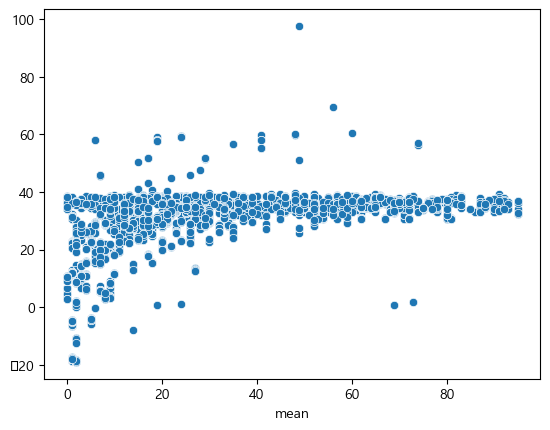

In [190]:
sns.scatterplot(x = Y_ts, y = pred_Y)

In [191]:
reg03 = xgb.XGBRegressor(alpha = 10, n_estimators = 30, max_depth = 5, colsample_bytree = 0.3, learning_rate = 0.1)
reg03.fit(X_tn, Y_tn)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=30, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

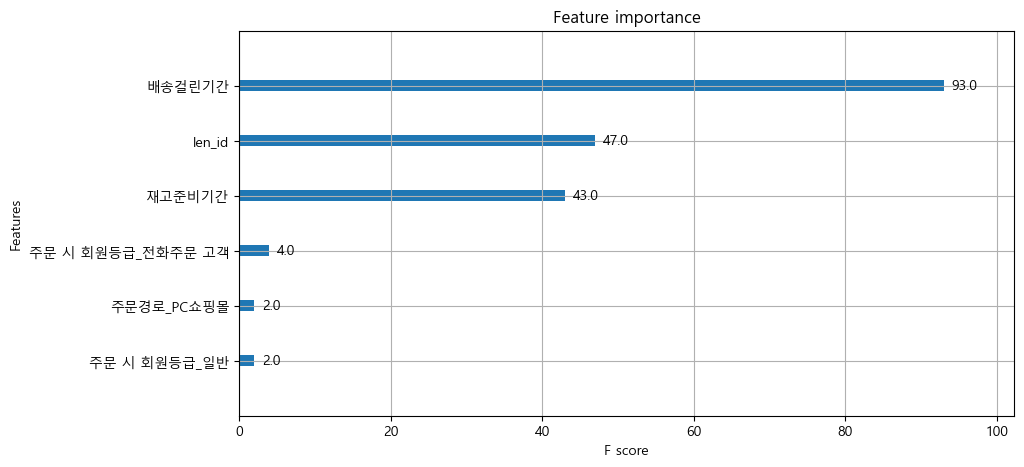

In [192]:
fig, ax = plt.subplots(figsize = (10, 5))
xgb.plot_importance(reg03, ax=ax)

<AxesSubplot: xlabel='mean'>

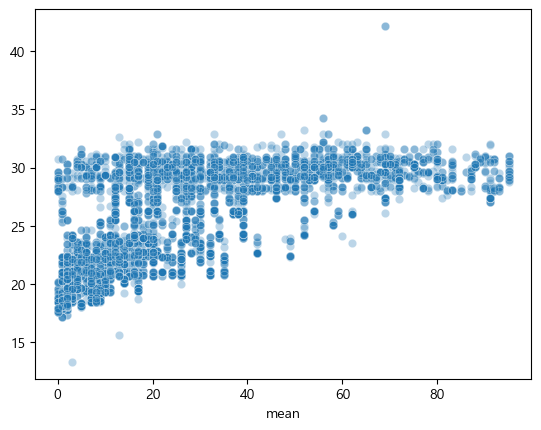

In [193]:
pred_Y = reg03.predict(X_ts)

sns.scatterplot(x = Y_ts, y = pred_Y, alpha = 0.3)

### sns계정의 매출비율

In [194]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        46749 non-null  object        
 1   공급원가        46661 non-null  float64       
 2   네이버 포인트     46749 non-null  int64         
 3   배송번호        46749 non-null  object        
 4   배송비 정보      46749 non-null  object        
 5   배송시작일       46749 non-null  datetime64[ns]
 6   배송완료일       46749 non-null  datetime64[ns]
 7   사용한 적립금액    46749 non-null  int64         
 8   상품구매금액      46749 non-null  int64         
 9   상품명         46661 non-null  object        
 10  상품번호        46661 non-null  float64       
 11  상품별 추가할인금액  46749 non-null  int64         
 12  수량          46749 non-null  int64         
 13  수령인 주소      46741 non-null  object        
 14  주문 시 회원등급   43644 non-null  object        
 15  주문경로        46749 non-null  object        
 16  주문번호        46749 non-

In [195]:
dt1_sns = dt1.copy()

In [196]:
dt1_sns = dt1_sns[dt1_sns['주문자ID'].notna()]

In [197]:
dt1_sns['sns계정'] = dt1_sns['주문자ID'].str.contains('@n|@k|@f')

In [198]:
dt1_sns['sns계정'].sum() / dt1_sns['sns계정'].count()

0.1529878104665017

In [199]:
dt1_sns1 = dt1_sns[dt1_sns['sns계정'] == 1]
dt1_sns0 = dt1_sns[dt1_sns['sns계정'] == 0]

In [200]:
dt1_sns1['판매가'].sum() / dt1_sns['판매가'].sum() * 100

15.080249783207083

### 연도별 회원가입 인원 수, 실제 구매회원 수

In [201]:
dt2_cnt = dt2.copy()
dt2_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         6575 non-null   object
 1   나이         6575 non-null   int64 
 2   사용가능 적립금   6575 non-null   int64 
 3   성별         6575 non-null   object
 4   주소(동/읍/면)  5941 non-null   object
 5   최종접속일      6523 non-null   object
 6   최종주문일      5153 non-null   object
 7   유입경로       6575 non-null   object
 8   유입기기       6575 non-null   object
 9   회원 가입일     6575 non-null   object
 10  사업자구분      6575 non-null   object
 11  회원구분       6575 non-null   object
 12  나이대        6575 non-null   object
dtypes: int64(2), object(11)
memory usage: 667.9+ KB


In [202]:
dt2_cnt['회원 가입일'] = pd.to_datetime(dt2_cnt['회원 가입일'], format='%Y-%m-%d')
dt2_cnt['회원 가입일']

0      2016-12-30
1      2017-01-01
2      2017-01-14
3      2017-01-17
4      2017-01-17
          ...    
6570   2019-05-31
6571   2019-06-05
6572   2019-06-12
6573   2019-06-19
6574   2019-06-21
Name: 회원 가입일, Length: 6575, dtype: datetime64[ns]

In [203]:
dt2_cnt=dt2_cnt[dt2_cnt['최종주문일'].notna()]


In [204]:
dt2_cnt['최종주문일']=dt2_cnt['최종주문일'].replace('오전','AM', regex=True).replace('오후','PM', regex=True)
dt2_cnt['최종주문일']

1        2017-01-01 PM 3:38
2       2017-02-26 PM 10:55
4        2018-12-19 PM 1:29
5        2017-01-18 PM 4:41
6        2017-02-13 PM 3:12
               ...         
6567    2019-05-31 AM 10:07
6568     2019-05-31 PM 4:58
6569     2019-05-31 PM 3:17
6570     2019-05-31 PM 4:30
6573    2019-06-19 AM 11:18
Name: 최종주문일, Length: 5153, dtype: object

In [205]:
dt2_cnt['최종주문일'] = pd.to_datetime(dt2_cnt['최종주문일'], format='%Y-%m-%d %p %I:%M')
dt2_cnt['최종주문일']

1      2017-01-01 15:38:00
2      2017-02-26 22:55:00
4      2018-12-19 13:29:00
5      2017-01-18 16:41:00
6      2017-02-13 15:12:00
               ...        
6567   2019-05-31 10:07:00
6568   2019-05-31 16:58:00
6569   2019-05-31 15:17:00
6570   2019-05-31 16:30:00
6573   2019-06-19 11:18:00
Name: 최종주문일, Length: 5153, dtype: datetime64[ns]

In [206]:
dt2_cnt['최종주문일'] = dt2_cnt['최종주문일'].astype('str')

In [207]:
dt2_cnt['최종주문일'] = dt2_cnt['최종주문일'].apply(lambda x: x.split(' ')[0])

In [208]:
dt2_cnt['최종주문일'] = dt2_cnt['최종주문일'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [209]:
dt2_cnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5153 entries, 1 to 6573
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         5153 non-null   object        
 1   나이         5153 non-null   int64         
 2   사용가능 적립금   5153 non-null   int64         
 3   성별         5153 non-null   object        
 4   주소(동/읍/면)  5001 non-null   object        
 5   최종접속일      5153 non-null   object        
 6   최종주문일      5153 non-null   datetime64[ns]
 7   유입경로       5153 non-null   object        
 8   유입기기       5153 non-null   object        
 9   회원 가입일     5153 non-null   datetime64[ns]
 10  사업자구분      5153 non-null   object        
 11  회원구분       5153 non-null   object        
 12  나이대        5153 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(9)
memory usage: 563.6+ KB


In [210]:
dt2_cnt['회원가입연도'] = dt2_cnt['회원 가입일'].apply(lambda x: x.year)
dt2_cnt['회원가입연도']

1       2017
2       2017
4       2017
5       2017
6       2017
        ... 
6567    2019
6568    2019
6569    2019
6570    2019
6573    2019
Name: 회원가입연도, Length: 5153, dtype: int64

In [211]:
dt2_cnt['최종구입연도'] = dt2_cnt['최종주문일'].apply(lambda x: x.year)
dt2_cnt['최종구입연도']

1       2017
2       2017
4       2018
5       2017
6       2017
        ... 
6567    2019
6568    2019
6569    2019
6570    2019
6573    2019
Name: 최종구입연도, Length: 5153, dtype: int64

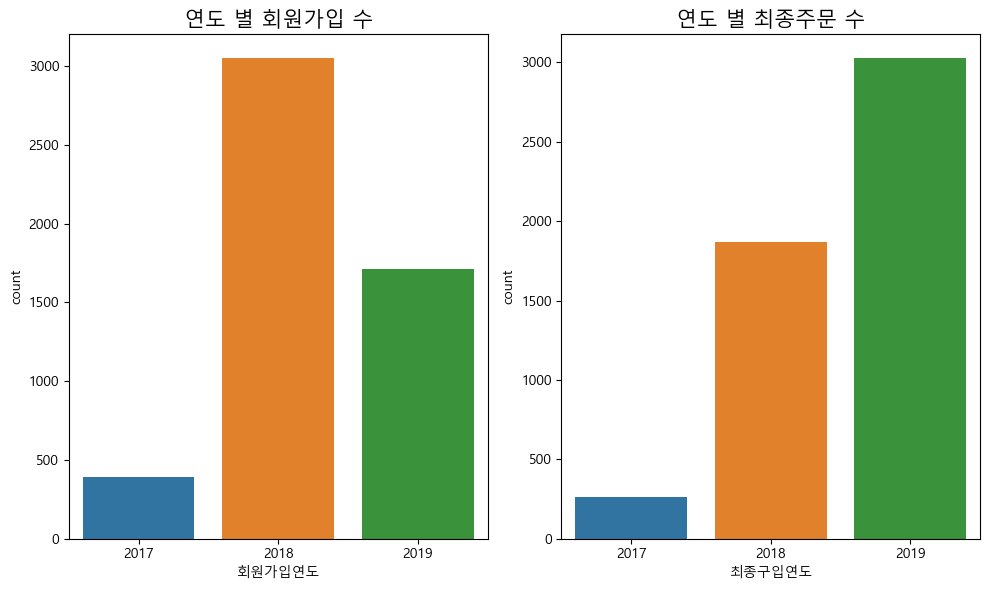

In [212]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.countplot(data = dt2_cnt, x = dt2_cnt['최종구입연도'], ax = ax2)
sns.countplot(data = dt2_cnt, x = dt2_cnt['회원가입연도'], ax = ax1)
ax1.set_title('연도 별 회원가입 수', loc='center', fontsize = 15)
ax2.set_title('연도 별 최종주문 수', loc='center', fontsize = 15)
fig.tight_layout()

In [213]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        46749 non-null  object        
 1   공급원가        46661 non-null  float64       
 2   네이버 포인트     46749 non-null  int64         
 3   배송번호        46749 non-null  object        
 4   배송비 정보      46749 non-null  object        
 5   배송시작일       46749 non-null  datetime64[ns]
 6   배송완료일       46749 non-null  datetime64[ns]
 7   사용한 적립금액    46749 non-null  int64         
 8   상품구매금액      46749 non-null  int64         
 9   상품명         46661 non-null  object        
 10  상품번호        46661 non-null  float64       
 11  상품별 추가할인금액  46749 non-null  int64         
 12  수량          46749 non-null  int64         
 13  수령인 주소      46741 non-null  object        
 14  주문 시 회원등급   43644 non-null  object        
 15  주문경로        46749 non-null  object        
 16  주문번호        46749 non-

In [214]:
dt1['주문연도'] = dt1['주문날짜'].apply(lambda x: x.year)
dt1['주문연도']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
46744    2017
46745    2017
46746    2017
46747    2017
46748    2017
Name: 주문연도, Length: 46749, dtype: int64

In [215]:
dt1_year_sell=dt1.groupby('주문연도', as_index=False)[['상품구매금액']].sum()
dt1_year_sell

주문연도      상품구매금액
0  2017   108027300
1  2018  1720813825
2  2019  1414050260

<AxesSubplot: xlabel='주문연도', ylabel='상품구매금액'>

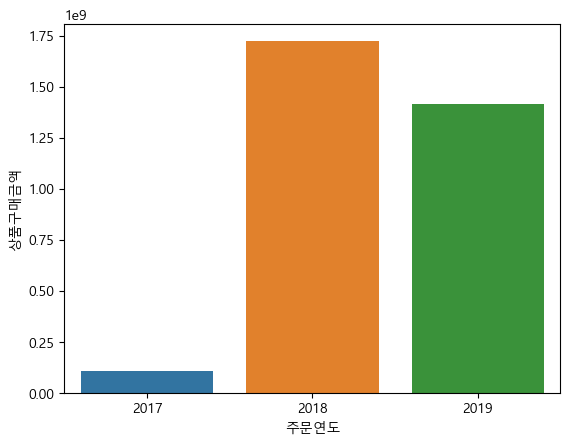

In [216]:
sns.barplot(data = dt1_year_sell, x = '주문연도', y = '상품구매금액')

### 배송지연 예측 머신러닝

In [217]:
dt_merge = dt1.merge(dt2, left_on = '주문자ID', right_on = 'ID')

dt_merge['카드사'] = dt_merge['카드사'].fillna('현금')
dt_merge['카드사']

dt_merge = dt_merge.dropna(axis = 0)

In [218]:
dt_merge['배송완료요일']= dt_merge['배송완료일'].apply(lambda x: x.weekday())


In [219]:
from sklearn.ensemble import RandomForestRegressor

In [220]:

def Age_MP(x):
    if x <= 4:
        return "0"
    if x > 4:
        return "1"
dt_merge['배송늦음유무'] = dt_merge['배송걸린기간'].apply(Age_MP)
dt_merge['배송늦음유무'] = dt_merge['배송늦음유무'].astype(str)


In [221]:

def Age_MP(x):
    if x == "서울특별시":
        return "1"
    if x == "경기도":
        return "2"
    if x == "충청북도":
        return "3"
    if x == "충청남도":
        return "4"
    if x == "경상북도":
        return "5"
    if x == "경상남도":
        return "6"
    if x == "전라북도":
        return "7"
    if x == "전라남도":
        return "8"
    if x == "부산광역시":
        return "9"
    if x == "대구광역시":
        return "10"
    if x == "강원도":
        return "11"
    if x == "울산광역시":
        return "12"
    if x == "광주광역시":
        return "13"
    if x == "인천광역시":
        return "14"
    if x == "대전광역시":
        return "15"
    if x == "제주특별자치도":
        return "16"
    if x == "세종특별자치시":
        return "17"


In [222]:
dt_merge['수령인 주소_dr'] = dt_merge['수령인 주소'].dropna().apply(lambda x: ' '.join(x.split(' ')[:1]))
dt_merge['수령인 주소_dr']

0        경상남도
1        경상남도
2        경상남도
3        경상남도
4        경상남도
         ... 
43520    충청북도
43521    충청북도
43522    전라북도
43523    전라북도
43524    충청남도
Name: 수령인 주소_dr, Length: 43201, dtype: object

In [223]:
dt_merge['택배배송기간'] = dt_merge['배송완료일'] - dt_merge['배송시작일']
dt_merge['택배배송기간']

dt_merge['주문요일'] = dt_merge['주문일시'].apply(lambda x: x.weekday())

dt_merge['배송시작요일'] = dt_merge['배송시작일'].apply(lambda x: x.weekday())

In [224]:
dt_merge['지역별코드'] = dt_merge['수령인 주소_dr'].apply(Age_MP)
dt_merge['지역별코드'] = dt_merge['지역별코드'].astype(str)


In [225]:

dataset = dt_merge[['택배배송기간', '재고준비기간', '상품구매금액', '수량', '지역별코드', '주문요일', '배송시작요일', '배송완료요일', '배송늦음유무']]
dataset = pd.get_dummies(dataset)
dataset


택배배송기간  재고준비기간  상품구매금액  수량  주문요일  배송시작요일  배송완료요일  지역별코드_1  \
0     3 days 20:36:00      11   71450   1     3       0       4        0   
1     3 days 20:31:00       4   49700   1     4       1       5        0   
2     3 days 20:31:00       4   91620   1     4       1       5        0   
3     3 days 20:30:00       2  102680   1     1       3       0        0   
4     3 days 20:07:00       3   99400   2     4       0       4        0   
...               ...     ...     ...  ..   ...     ...     ...      ...   
43520 3 days 12:50:00       0   79200   1     2       2       6        0   
43521 3 days 12:50:00       0       0   1     2       2       6        0   
43522 3 days 12:59:00       0   86240   1     4       4       1        0   
43523 3 days 12:59:00       0       0   1     4       4       1        0   
43524 3 days 16:55:00       3   81620   1     6       2       6        0   

       지역별코드_10  지역별코드_11  ...  지역별코드_2  지역별코드_3  지역별코드_4  지역별코드_5  지역별코드_6  \
0             0         0  ...        0        0        0        0        1   
1             0         0  ...        0        0        0        0        1   
2             0         0  ...        0        0        0        0        1   
3             0         0  ...        0        0        0        0        1   
4             0         0  ...        0        0        0        0        1   
...         ...       ...  ...      ...      ...      ...      ...      ...   
43520         0         0  ...        0        1        0        0        0   
43521         0         0  ...        0        1        0        0        0   
43522         0         0  ...        0        0        0        0        0   
43523         0         0  ...        0        0        0        0        0   
43524         0         0  ...        0        0        1        0        0   

       지역별코드_7  지역별코드_8  지역별코드_9  배송늦음유무_0  배송늦음유무_1  
0            0        0        0         0         1  
1            0        0        0         0         1  
2            0        0        0         0         1  
3            0        0        0         0         1  
4            0        0        0         0         1  
...        ...      ...      ...       ...       ...  
43520        0        0        0         1         0  
43521        0        0        0         1         0  
43522        1        0        0         1         0  
43523        1        0        0         1         0  
43524        0        0        0         0         1  

[43201 rows x 26 columns]

In [226]:

x = dt_merge[['택배배송기간', '재고준비기간', '상품구매금액', '수량', '지역별코드', '주문요일', '배송시작요일', '배송완료요일', '배송늦음유무']] # input data
y = dt_merge['배송걸린기간'] # target data


In [227]:
x['택배배송기간'] = x['택배배송기간'].apply(lambda x: x.days)

C:\Users\operation\AppData\Local\Temp\ipykernel_8\4189592911.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [228]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)


In [229]:
# 모델설정
model = RandomForestRegressor(max_depth = 4, random_state = 5)
model.fit(x_train, y_train)
y_test_prediction = model.predict(x_test)
pred_rfr = model.predict(x_test)
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print(f'훈련 정확도는 : {train_accuracy}, 테스트 정확도는 {test_accuracy} 입니다.')

mean_squared_error(y_test,y_test_prediction)

model.feature_importances_

훈련 정확도는 : 0.9810337885104395, 테스트 정확도는 0.8422980641997659 입니다.


array([1.53863195e-02, 9.42393784e-01, 1.29571948e-03, 0.00000000e+00,
       6.07488683e-04, 3.18303755e-05, 9.96784470e-04, 9.85068808e-04,
       3.83030049e-02])

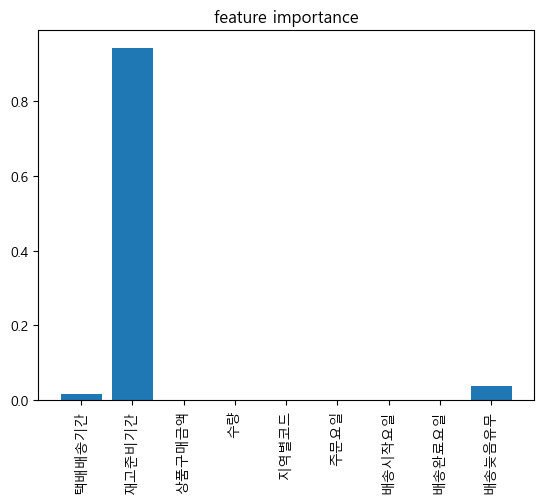

In [230]:
importance = model.feature_importances_
importance

plt.figure()
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), x.columns, rotation = 90)
plt.show()

### 탈주 예측모델

In [231]:
dt1['지역_시도'] = dt1['지역'].astype(str).apply(lambda x:' '.join(x.split(' ')[:2]))
dt1['지역_시'] = dt1['지역'].astype(str).apply(lambda x:' '.join(x.split(' ')[:1]))

In [232]:
dt1['지역_시']=dt1['지역_시'].replace('강원','강원도').replace('경기','경기도').replace('인천','인천광역시').replace('경남','경상남도').replace('경북','경상북도').replace('충북','충청북도').replace('광주','광주광역시').replace('대전','대전광역시').replace('울산','울산광역시').replace('부산','부산광역시').replace('대구','대구광역시').replace('서울','서울특별시').replace('충남','충청남도').replace('전남','전라남도').replace('전북','전라북도').replace('제주','제주특별자치도').replace('세종','세종특별자치시')
dt1['지역_시도'] = dt1['지역_시도'].replace('강원 강릉시','강원도 강릉시').replace('강원 동해시','강원도 동해시').replace('강원 속초시','강원도 속초시').replace('강원 원주시','강원도 원주시').replace('강원 춘천시','강원도 춘천시').replace('강원 태백시','강원도 태백시').replace('강원 평창군','강원도 평창군').replace('강원 홍천군','강원도 홍천군').replace('강원 화천군','강원도 화천군').replace('강원 횡성군','강원도 횡성군').replace('경기 가평군','경기도 가평군').replace('경기 고양시','경기도 고양시').replace('경기 과천시','경기도 과천시').replace('경기 광명시','경기도 광명시').replace('경기 광주시','경기도 광주시').replace('경기 구리시','경기도 구리시').replace('경기 군포시','경기도 군포시').replace('경기 김포시','경기도 김포시').replace('경기 남양주시','경기도 남양주시').replace('경기 동두천시','경기도 동두천시').replace('경기 부천시','경기도 부천시').replace('경기 성남시','경기도 성남시').replace('경기 수원시','경기도 수원시').replace('경기 시흥시','경기도 시흥시').replace('경기 안산시','경기도 안산시').replace('경기 안성시','경기도 안성시')
dt1['지역_시도'] = dt1['지역_시도'].replace('경기 안성시','경기도 안성시').replace('경기 안양시','경기도 안양시').replace('경기 양주시','경기도 양주시').replace('경기 양평군','경기도 양평군').replace('경기 여주시','경기도 여주시').replace('경기 연천군','경기도 연천군').replace('경기 오산시','경기도 오산시').replace('경기 용인시','경기도 용인시').replace('경기 의왕시','경기도 의왕시').replace('경기 의정부시','경기도 의정부시').replace('경기 이천시','경기도 이천시').replace('경기 파주시','경기도 파주시').replace('경기 평택시','경기도 평택시').replace('경기 포천시','경기도 포천시').replace('경기 하남시','경기도 하남시').replace('경기 화성시','경기도 화성시').replace('경남 거제시','경상남도 거제시').replace('경남 거창군','경상남도 거창군').replace('경남 고성군','경상남도 고성군').replace('경남 김해시','경상남도 김해시').replace('경남 남해군','경상남도 남해군').replace('경남 밀양시','경상남도 밀양시').replace('경남 사천시','경상남도 사천시').replace('경남 산청군','경상남도 산청군').replace('경남 양산시','경상남도 양산시').replace('경남 의령군','경상남도 의령군')
dt1['지역_시도'] = dt1['지역_시도'].replace('경남 진주시','경상남도 진주시').replace('경남 창녕군','경상남도 창녕군').replace('경남 창원시','경상남도 창원시').replace('경남 통영시','경상남도 통영시').replace('경남 하동군','경상남도 하동군').replace('경남 함안군','경상남도 함안군').replace('경남 함양군','경상남도 함양군').replace('경남 합천군','경상남도 합천군').replace('경북 경산시','경상북도 경산시').replace('경북 경주시','경상북도 경주시').replace('경북 고령군','경상북도 고령군').replace('경북 구미시','경상북도 구미시').replace('경북 군위군','경상북도 군위군').replace('경북 김천시','경상북도 김천시').replace('경북 문경시','경상북도 문경시').replace('경북 봉화군','경상북도 봉화군').replace('경북 상주시','경상북도 상주시').replace('경북 성주군','경상북도 성주군').replace('경북 안동시','경상북도 안동시').replace('경북 영덕군','경상북도 영덕군').replace('경북 영양군','경상북도 영양군').replace('경북 영주시','경상북도 영주시').replace('경북 영천시','경상북도 영천시').replace('경북 예천군','경상북도 예천군')
dt1['지역_시도'] = dt1['지역_시도'].replace('경북 울릉군','경상북도 울릉군')
dt1['지역_시도'] = dt1['지역_시도'].replace('서울 강서구', '서울특별시 강서구').replace('서울 관악구', '서울특별시 관악구').replace('서울 광진구', '서울특별시 광진구').replace('서울 구로구', '서울특별시 구로구').replace('서울 금천구', '서울특별시 금천구').replace('서울 노원구', '서울특별시 노원구').replace('서울 도봉구', '서울특별시 도봉구').replace('서울 동대문구', '서울특별시 동대문구').replace('서울 동작구', '서울특별시 동작구').replace('서울 마포구', '서울특별시 마포구').replace('서울 서대문구', '서울특별시 서대문구').replace('서울 서초구', '서울특별시 서초구').replace('서울 성동구', '서울특별시 성동구').replace('서울 성북구', '서울특별시 성북구').replace('서울 송파구', '서울특별시 송파구').replace('서울 양천구', '서울특별시 양천구').replace('서울 영등포구', '서울특별시 영등포구').replace('서울 용산구', '서울특별시 용산구').replace('서울 은평구', '서울특별시 은평구').replace('서울 종로구', '서울특별시 종로구').replace('서울 중구', '서울특별시 중구')
dt1['지역_시도'] = dt1['지역_시도'].replace('광주 북구', '광주광역시 북구').replace('광주 남구', '광주광역시 남구').replace('광주 동구', '광주광역시 동구').replace('광주 서구', '광주광역시 서구')
dt1['지역_시도'] = dt1['지역_시도'].replace('부산 동구', '부산광역시 동구').replace('부산 부산진구', '부산광역시 부산진구')
dt1['지역_시도'] = dt1['지역_시도'].replace('인천 부평구', '인천광역시 부평구').replace('인천 중구', '인천광역시 중구')
dt1['지역_시도'] = dt1['지역_시도'].replace('충북 청주시', '충청북도 청주시')

In [233]:
dt2['최종접속일'] = dt2['최종접속일'].astype(str)
dt2['최종접속일'].dropna()
dt2['최종접속일'] = dt2['최종접속일'].apply(lambda x: x.replace('오전', 'am').replace('오후', 'pm'))
dt2['최종접속일'] = dt2['최종접속일'].apply(lambda x: ' '.join(x.split(' ')[:1]))
dt2['최종접속일'] = pd.to_datetime(dt2['최종접속일'], format = '%Y-%m-%d')


In [234]:

dt2['회원 가입일'] = pd.to_datetime(dt2['회원 가입일'])
dt2['회원 가입일']


0      2016-12-30
1      2017-01-01
2      2017-01-14
3      2017-01-17
4      2017-01-17
          ...    
6570   2019-05-31
6571   2019-06-05
6572   2019-06-12
6573   2019-06-19
6574   2019-06-21
Name: 회원 가입일, Length: 6575, dtype: datetime64[ns]

In [235]:

dt2['최종접속일'] - dt2['회원 가입일']
dt2['탈주고객'] = dt2['최종접속일'] - dt2['회원 가입일']
dt2['탈주고객'] = dt2['탈주고객'].astype(str)
dt2['탈주고객']=dt2['탈주고객'].apply(lambda x: ' '.join(x.split(' ')[:1]))


In [236]:

dt2['탈주고객'].replace('NaT', '0', inplace = True)
dt2['탈주고객'] = dt2['탈주고객'].astype(int)
dt2['탈주고객'] = dt2['탈주고객'].dropna()


In [237]:

def EXIT_Customer(x):
    if x >= 35:
        return "1"
    if x < 35:
        return "0"
EXIT_Customer(70)


'1'

In [238]:

dt2['탈주고객'] = dt2['탈주고객'].apply(EXIT_Customer)
dt2['탈주고객'] = dt2['탈주고객'].astype(int)
dt2['탈주고객'].mean()


0.3977186311787072

In [239]:

def Delivery(x):
    if x >= 6:
        return "1"
    if x < 6:
        return "0"


In [240]:
dt3['품절여부']=dt3['품절여부'].replace('정상',1).replace('품절',0)
dt3['재입고알림']=dt3['재입고알림'].replace('사용함',1).replace('사용안함',0)
dt3['과세/면세'] = dt3['과세/면세'].replace('과세',1).replace('면세',0)

In [241]:
join_data = dt1.merge(dt2, left_on = '주문자ID', right_on='ID' ,how = 'left')

In [242]:
join_data['수익률'] = 1 - (join_data['공급원가'] / join_data['판매가'])
join_data['수익률']

0        0.376487
1        0.376947
2        0.509705
3        0.393382
4        0.349593
           ...   
46744    0.312500
46745    0.352941
46746    0.381111
46747    0.251293
46748    0.353100
Name: 수익률, Length: 46749, dtype: float64

In [243]:
join_data['배송지연여부'] = join_data['배송걸린기간'].apply(Delivery)
join_data['배송지연여부'] = join_data['배송지연여부'].astype(int)

In [244]:
def CITY_Customer(x):
    if x == '서울특별시':
        return "1"
    if x == '경기도':
        return "1"
    if x == '인천광역시':
        return "1"
    else:
        return "0"

In [245]:
join_data['수도권'] = join_data['지역_시'].apply(CITY_Customer)
join_data['수도권']

0        0
1        1
2        0
3        0
4        0
        ..
46744    1
46745    1
46746    0
46747    0
46748    0
Name: 수도권, Length: 46749, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'nan'),
  Text(1, 0, '강원도'),
  Text(2, 0, '경기도'),
  Text(3, 0, '경상남도'),
  Text(4, 0, '경상북도'),
  Text(5, 0, '광주광역시'),
  Text(6, 0, '대구광역시'),
  Text(7, 0, '대전광역시'),
  Text(8, 0, '부산광역시'),
  Text(9, 0, '서울특별시'),
  Text(10, 0, '세종특별자치시'),
  Text(11, 0, '울산광역시'),
  Text(12, 0, '인천광역시'),
  Text(13, 0, '전라남도'),
  Text(14, 0, '전라북도'),
  Text(15, 0, '제주특별자치도'),
  Text(16, 0, '충청남도'),
  Text(17, 0, '충청북도')])

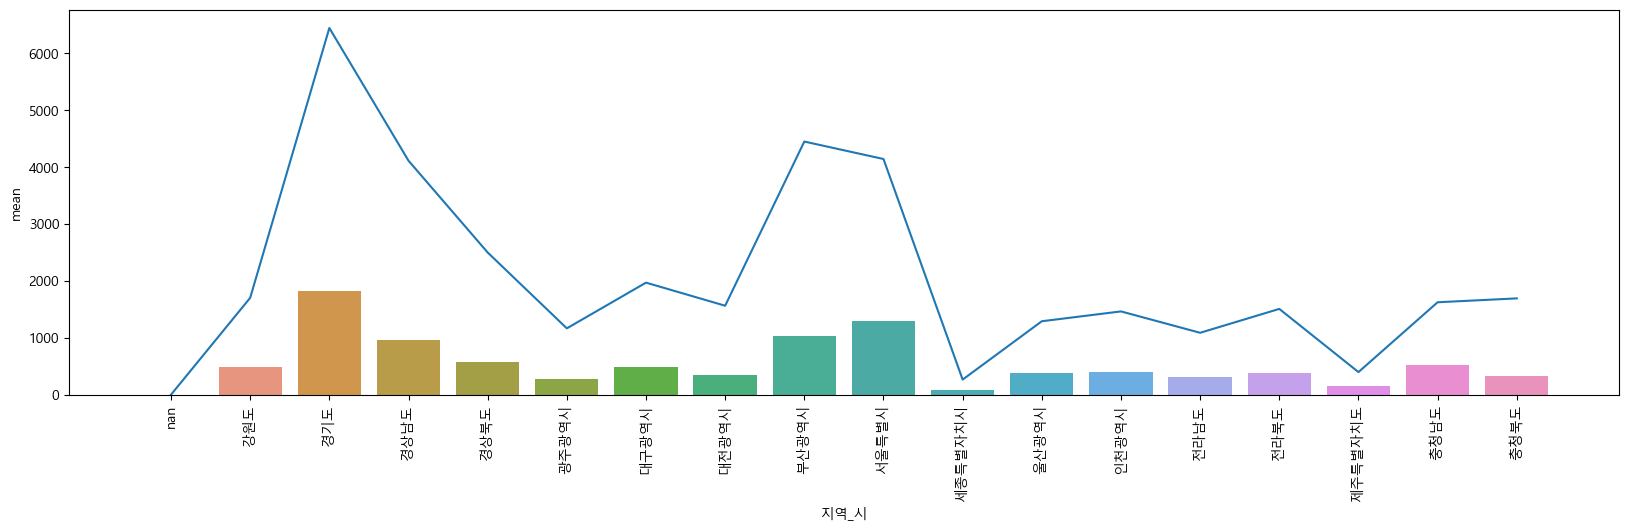

In [246]:
fig = plt.figure(figsize=(20,5))
dtDTE = join_data.groupby(['지역_시'], as_index = False).agg(mean = ('배송지연여부', 'sum'))
dtDTC = join_data.groupby(['지역_시'], as_index = False).agg(mean = ('탈주고객', 'sum'))
sns.barplot(data = dtDTE, x = '지역_시',y = 'mean')
sns.lineplot(data = dtDTC, x = '지역_시',y = 'mean')
plt.xticks(rotation = 90)

In [247]:
join_data=join_data[join_data['수익률'].notna()]
join_data=join_data[join_data['공급원가'].notna()]

In [248]:
dt2['탈주고객'].replace('NaT', '0', inplace = True, regex = True)
dt2['탈주고객'] = dt2['탈주고객'].astype(int)
dt2['탈주고객'] = dt2['탈주고객'].dropna()

In [249]:
join_data['탈주고객'] = join_data['탈주고객'].fillna(0)

In [250]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44703 entries, 0 to 46748
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        44703 non-null  object        
 1   공급원가        44703 non-null  float64       
 2   네이버 포인트     44703 non-null  int64         
 3   배송번호        44703 non-null  object        
 4   배송비 정보      44703 non-null  object        
 5   배송시작일       44703 non-null  datetime64[ns]
 6   배송완료일       44703 non-null  datetime64[ns]
 7   사용한 적립금액    44703 non-null  int64         
 8   상품구매금액      44703 non-null  int64         
 9   상품명         44703 non-null  object        
 10  상품번호        44703 non-null  float64       
 11  상품별 추가할인금액  44703 non-null  int64         
 12  수량          44703 non-null  int64         
 13  수령인 주소      44696 non-null  object        
 14  주문 시 회원등급   41640 non-null  object        
 15  주문경로        44703 non-null  object        
 16  주문번호        44703 non-

In [251]:
join_data['수익률'].replace(-np.inf, 0, inplace = True)

In [252]:
join_data = join_data[join_data['나이'].notna()]
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41523 entries, 0 to 46748
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        41523 non-null  object        
 1   공급원가        41523 non-null  float64       
 2   네이버 포인트     41523 non-null  int64         
 3   배송번호        41523 non-null  object        
 4   배송비 정보      41523 non-null  object        
 5   배송시작일       41523 non-null  datetime64[ns]
 6   배송완료일       41523 non-null  datetime64[ns]
 7   사용한 적립금액    41523 non-null  int64         
 8   상품구매금액      41523 non-null  int64         
 9   상품명         41523 non-null  object        
 10  상품번호        41523 non-null  float64       
 11  상품별 추가할인금액  41523 non-null  int64         
 12  수량          41523 non-null  int64         
 13  수령인 주소      41523 non-null  object        
 14  주문 시 회원등급   41523 non-null  object        
 15  주문경로        41523 non-null  object        
 16  주문번호        41523 non-

In [253]:
X = join_data[['수량','판매가','배송걸린기간','택배배송','재고준비기간','사용한 적립금액', '네이버 포인트','공급원가','수익률','상품구매금액','수도권' ]]
Y = join_data['탈주고객']

In [254]:
X.shape

(41523, 11)

In [255]:
Y.isnull().sum()

0

In [256]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.02, random_state = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [257]:
scaler = StandardScaler()
scaler.fit(X)

scaled_X = scaler.transform(X)
print(f'스케일 변환 뒤 데이터 모양 : {scaled_X.shape}')

스케일 변환 뒤 데이터 모양 : (41523, 11)


In [258]:
pca = PCA(n_components=2)
pca.fit(scaled_X)

pca_X = pca.transform(scaled_X)
print(f'주성분 분석을 활용한 차원 축소 후 데이터 모양 : {pca_X.shape}')

주성분 분석을 활용한 차원 축소 후 데이터 모양 : (41523, 2)


In [259]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [260]:
from sklearn.tree import DecisionTreeClassifier

i=5
dtc = DecisionTreeClassifier(max_depth =i)
dtc.fit(X_train,Y_train)
pred_rf = dtc.predict(X_test)

In [261]:
dtc_train_score = dtc.score(X_train, Y_train)
dtc_test_score = dtc.score(X_test, Y_test)
print(f'max_depth = {i},  dtc_train_score : {round(dtc_train_score,3)}, dtc_test_score : {round(dtc_test_score,3)}, delta : {round(dtc_train_score-dtc_test_score,3)}')

max_depth = 5,  dtc_train_score : 0.862, dtc_test_score : 0.888, delta : -0.026


C:\Users\operation\AppData\Local\Temp\ipykernel_8\3865541034.py:4: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



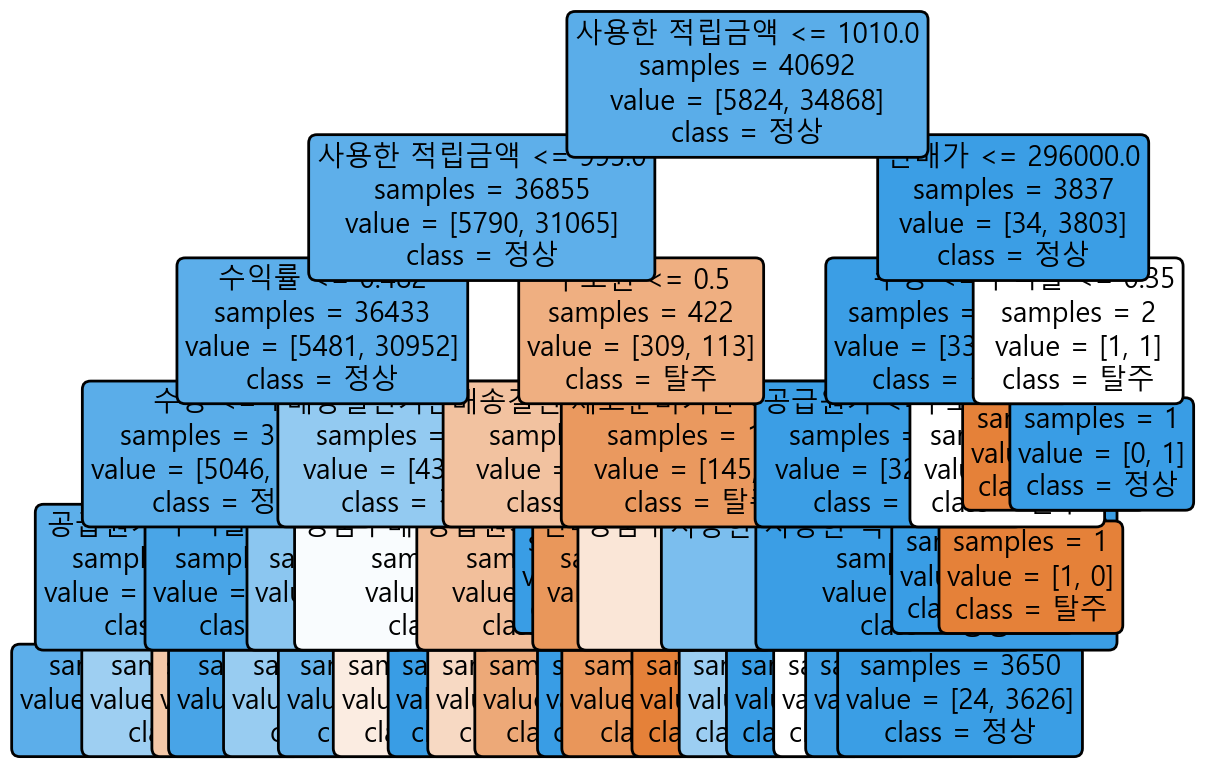

In [262]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
#plt.rcParams['figure.figsize'] = [27,10]
plot_tree(dtc, class_names=["탈주", "정상"],
          feature_names=dtc.feature_names_in_,
         impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

In [263]:
# x = join_data[['수량','판매가','배송걸린기간','택배배송','재고준비기간','사용한 적립금액', '네이버 포인트','공급원가','수익률','상품구매금액' ]]
# from sklearn.preprocessing import MinMaxScaler
# scaler_steel = MinMaxScaler()
# scaler_steel.fit(x)
# x_scaled=scaler_steel.transform(x)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(x_scaled)
# x_scaled_pca = pca.transform(x_scaled)

# from sklearn.cluster import DBSCAN
# dbs = DBSCAN(min_samples = 10, eps=0.1)
# dbs.fit(x_scaled_pca)
# label_dbs = dbs.labels_
# dbs_columns = ['dbs_comp1', 'dbs_comp2']
# X_dbs_df = pd.DataFrame(x_scaled_pca, columns=dbs_columns)
# X_dbs_df['label_dbs'] = label_dbs
# X_dbs_df['target'] = join_data['탈주고객']
# fig, axes = plt.subplots(1, 2)
# sns.scatterplot(
#     data = X_dbs_df, x = 'dbs_comp1', y = 'dbs_comp2', hue = 'target', ax = axes[0]
#     ).set(title='target')
# sns.scatterplot(
#     data = X_dbs_df, x = 'dbs_comp1', y = 'dbs_comp2', hue = 'label_dbs', ax = axes[1]
#     ).set(title='DBSCAN')
# fig.tight_layout()
# plt.legend([],[], frameon=False)

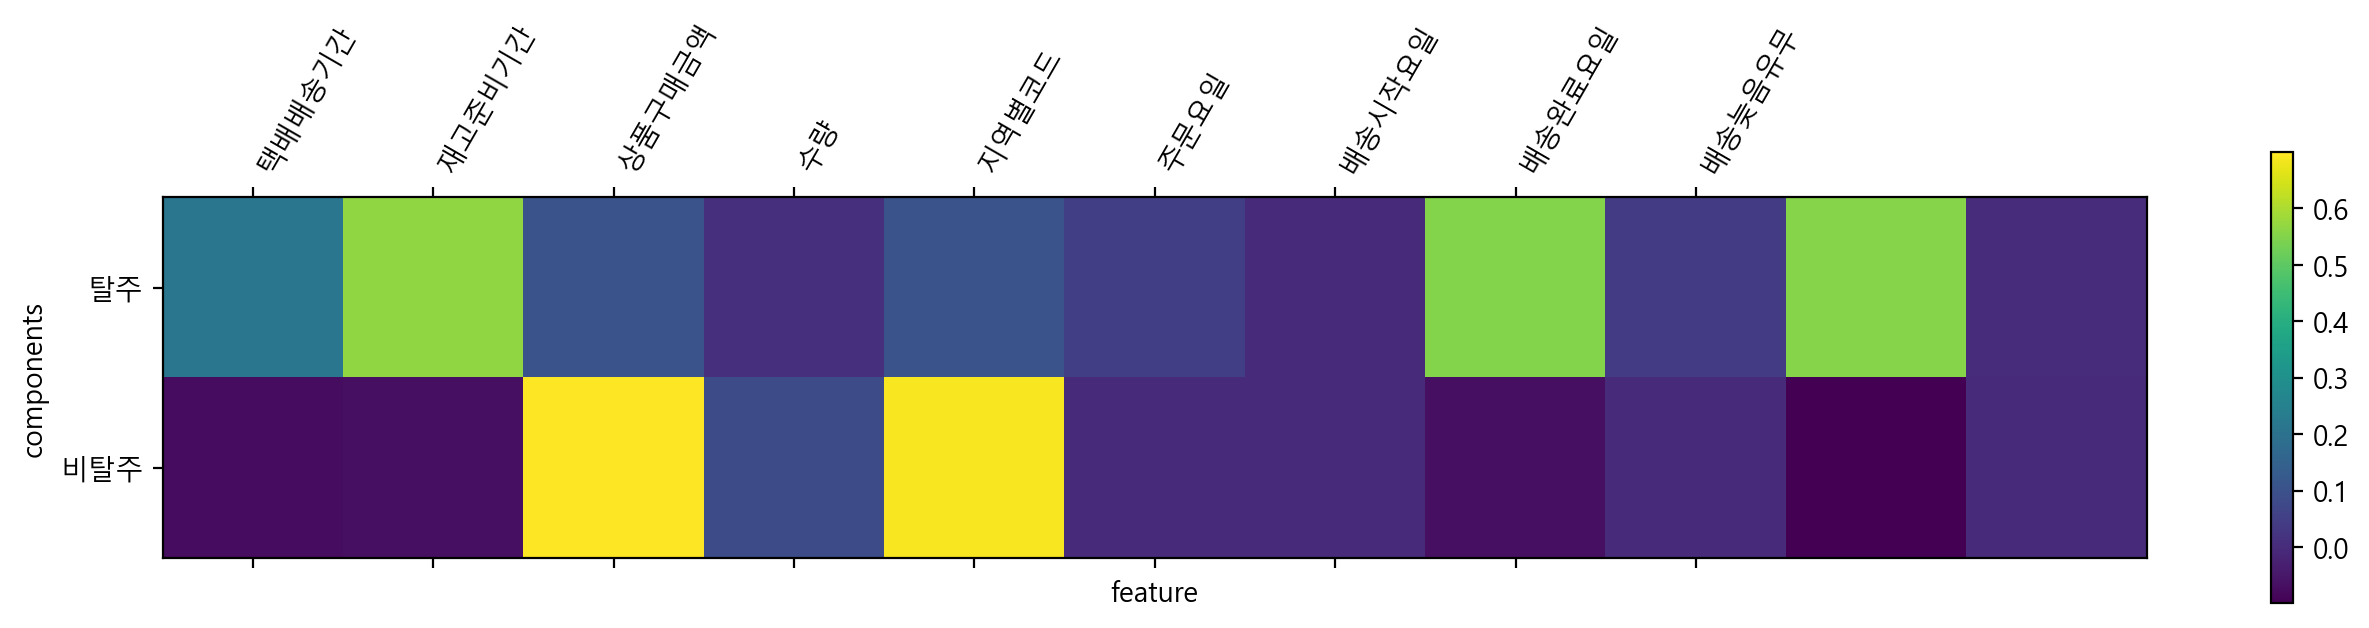

In [264]:
import matplotlib.pyplot as plt
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['탈주', '비탈주'])
plt.colorbar()
plt.xticks(range(len(x.columns)),
          x.columns, rotation = 60, ha = 'left')
plt.xlabel('feature')
plt.ylabel('components')
plt.show()

In [265]:
join_data['최종주문일'] = join_data['최종주문일'].astype(str)
join_data['최종주문일'].dropna()
join_data['최종주문일'] = join_data['최종주문일'].apply(lambda x: x.replace('오전', 'am').replace('오후', 'pm'))
join_data['최종주문일'] = join_data['최종주문일'].apply(lambda x: ' '.join(x.split(' ')[:1]))
join_data['최종주문일'] = pd.to_datetime(join_data['최종주문일'], format = '%Y-%m-%d')

In [266]:
join_data['마지막날'] = '2019-05-28'
join_data['마지막날']= pd.to_datetime(join_data['마지막날'])

In [267]:
join_data['탈주고객'] = join_data['마지막날'] - join_data['최종주문일']
join_data['탈주고객'] = join_data['탈주고객'].astype(str)
join_data['탈주고객'] = join_data['탈주고객'].apply(lambda x: ' '.join(x.split(' ')[:1]))

In [268]:
join_data['탈주고객'].replace('NaT', '0', inplace = True)
join_data['탈주고객'] = join_data['탈주고객'].astype(int)
join_data['탈주고객'] = join_data['탈주고객'].dropna()

In [269]:
join_data['탈주고객'].describe()

count    41523.000000
mean        78.748693
std        124.985786
min        -22.000000
25%          3.000000
50%         19.000000
75%         99.000000
max        877.000000
Name: 탈주고객, dtype: float64

In [270]:
def EXIT_Customer(x):
    if x >= 99:
        return "1"
    if x < 99:
        return "0"
EXIT_Customer(70)

'0'

In [271]:
join_data['탈주고객'].replace('NaT', '0', inplace = True, regex = True)
join_data['탈주고객'] = join_data['탈주고객'].astype(int)
join_data['탈주고객'] = join_data['탈주고객'].dropna()

In [272]:
join_data['탈주고객'] = join_data['탈주고객'].apply(EXIT_Customer)
join_data['탈주고객'] = join_data['탈주고객'].astype(int)
join_data['탈주고객'].mean()

0.25075259494737856

In [273]:
join_map = join_data.copy()

In [274]:
join_map['CTP_KOR_NM'] = join_map['지역'].apply(lambda x: x.split(' ')[0])
join_map['CTP_KOR_NM'].unique()

array(['경상남도', '서울특별시', '부산광역시', '대구광역시', '경상북도', '충청남도', '전라남도', '경기도',
       '전라북도', '충청북도', '강원도', '울산광역시', '광주광역시', '인천광역시', '대전광역시',
       '제주특별자치도', '세종특별자치시'], dtype=object)

In [275]:
join_map2=join_map.groupby('CTP_KOR_NM', as_index=False)[['탈주고객']].sum()
join_map2.rename(columns = {'탈주고객':'이탈고객'}, inplace = True)

In [276]:
fig = px.choropleth(join_map2, geojson=geometry_gj, locations='CTP_KOR_NM', color = '이탈고객', color_continuous_scale='Reds',featureidkey='properties.CTP_KOR_NM')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='도시별 탈주', title_font_size=20)
fig.update_layout(
        autosize=False,
     
    )

### 상품 별 매출액 top 10

In [299]:
top_sell = dt1.groupby('상품명', as_index = False)[['판매가']].sum()
top_sell = top_sell.sort_values(by = '판매가', ascending = False)
top10=top_sell.head(10)


764445560

In [300]:
top10['판매가'].sum() / top_sell['판매가'].sum() * 100

28.165163667548725

In [307]:
top10['판매가'].count() / top_sell['판매가'].count() * 100

1.550387596899225

<AxesSubplot: xlabel='판매가', ylabel='상품명'>

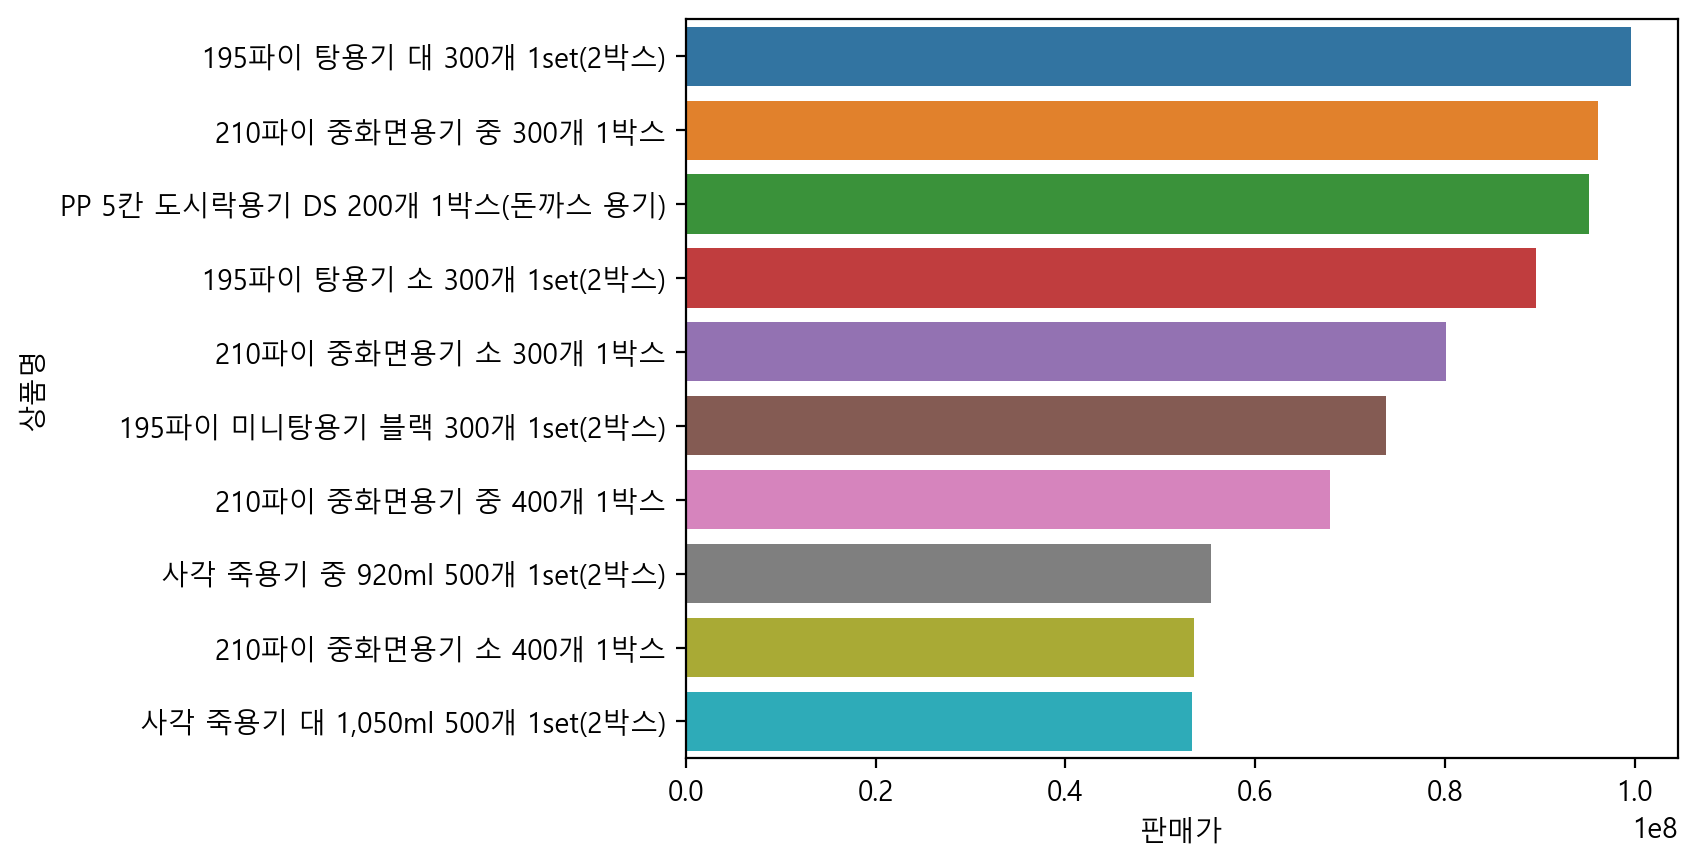

In [278]:
sns.barplot(data = top10, x = '판매가', y = '상품명')

### 연령별 마지막 접속일, 마지막 구매일

In [279]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46749 entries, 0 to 46748
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   결제수단        46749 non-null  object  
 1   공급원가        46661 non-null  float64 
 2   교환구분        46749 non-null  object  
 3   네이버 포인트     46749 non-null  int64   
 4   배송번호        46749 non-null  object  
 5   배송비 정보      46749 non-null  object  
 6   배송시작일       46749 non-null  object  
 7   배송완료일       46749 non-null  object  
 8   사용한 적립금액    46749 non-null  int64   
 9   상품구매금액      46749 non-null  int64   
 10  상품명         46661 non-null  object  
 11  상품번호        46661 non-null  float64 
 12  상품별 추가할인금액  46749 non-null  int64   
 13  수량          46749 non-null  int64   
 14  수령인 주소      46741 non-null  object  
 15  주문 시 회원등급   43644 non-null  object  
 16  주문경로        46749 non-null  object  
 17  주문번호        46749 non-null  object  
 18  주문일시        46749 non-null  object  
 19  주문자I

In [280]:
dt_notna = dt[dt['최종접속일'].notna()]
dt_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43525 entries, 0 to 46748
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   결제수단        43525 non-null  object  
 1   공급원가        43479 non-null  float64 
 2   교환구분        43525 non-null  object  
 3   네이버 포인트     43525 non-null  int64   
 4   배송번호        43525 non-null  object  
 5   배송비 정보      43525 non-null  object  
 6   배송시작일       43525 non-null  object  
 7   배송완료일       43525 non-null  object  
 8   사용한 적립금액    43525 non-null  int64   
 9   상품구매금액      43525 non-null  int64   
 10  상품명         43479 non-null  object  
 11  상품번호        43479 non-null  float64 
 12  상품별 추가할인금액  43525 non-null  int64   
 13  수량          43525 non-null  int64   
 14  수령인 주소      43525 non-null  object  
 15  주문 시 회원등급   43525 non-null  object  
 16  주문경로        43525 non-null  object  
 17  주문번호        43525 non-null  object  
 18  주문일시        43525 non-null  object  
 19  주문자I

In [281]:
dt_notna['최종주문일'] = dt_notna['최종주문일'].replace('오전','AM', regex = True).replace('오후','PM', regex = True)
dt_notna['최종접속일'] = dt_notna['최종접속일'].replace('오전','AM', regex = True).replace('오후','PM', regex = True)

C:\Users\operation\AppData\Local\Temp\ipykernel_8\3388712756.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\operation\AppData\Local\Temp\ipykernel_8\3388712756.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [282]:
dt_notna['최종접속일'] = pd.to_datetime(dt_notna['최종접속일'], format = '%Y-%m-%d %p %I:%M')
dt_notna['최종주문일'] = pd.to_datetime(dt_notna['최종주문일'], format = '%Y-%m-%d %p %I:%M')

C:\Users\operation\AppData\Local\Temp\ipykernel_8\2716205677.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\operation\AppData\Local\Temp\ipykernel_8\2716205677.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [283]:
from datetime import date

In [284]:
dt_notna['최종접속일'] = dt_notna['최종접속일'].apply(lambda x: x.strftime('%Y-%m-%d'))
dt_notna['최종주문일'] = dt_notna['최종주문일'].apply(lambda x: x.strftime('%Y-%m-%d'))

C:\Users\operation\AppData\Local\Temp\ipykernel_8\179699213.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\operation\AppData\Local\Temp\ipykernel_8\179699213.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [285]:
dt_notna['최종주문일'] = pd.to_datetime(dt_notna['최종주문일'], format = '%Y-%m-%d')
dt_notna['최종접속일'] = pd.to_datetime(dt_notna['최종접속일'], format = '%Y-%m-%d')

C:\Users\operation\AppData\Local\Temp\ipykernel_8\3790544155.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\operation\AppData\Local\Temp\ipykernel_8\3790544155.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [286]:
dt_finday = dt_notna.groupby('나이대', as_index=False)[['최종접속일','최종주문일']].mean()
dt_finday

나이대                         최종접속일                         최종주문일
0     20대 2019-04-18 06:18:10.229661440 2019-04-12 08:59:24.966913024
1     30대 2019-02-23 11:14:18.504965888 2019-02-13 10:45:06.116047872
2     40대 2019-03-21 23:26:09.607343104 2019-03-14 17:26:09.607343104
3     50대 2019-01-17 17:14:47.892376832 2019-01-07 04:12:38.744394752
4  60대 이상 2019-02-10 19:52:34.322305280 2019-02-02 22:21:38.612593408

<AxesSubplot: xlabel='나이대', ylabel='최종접속일'>

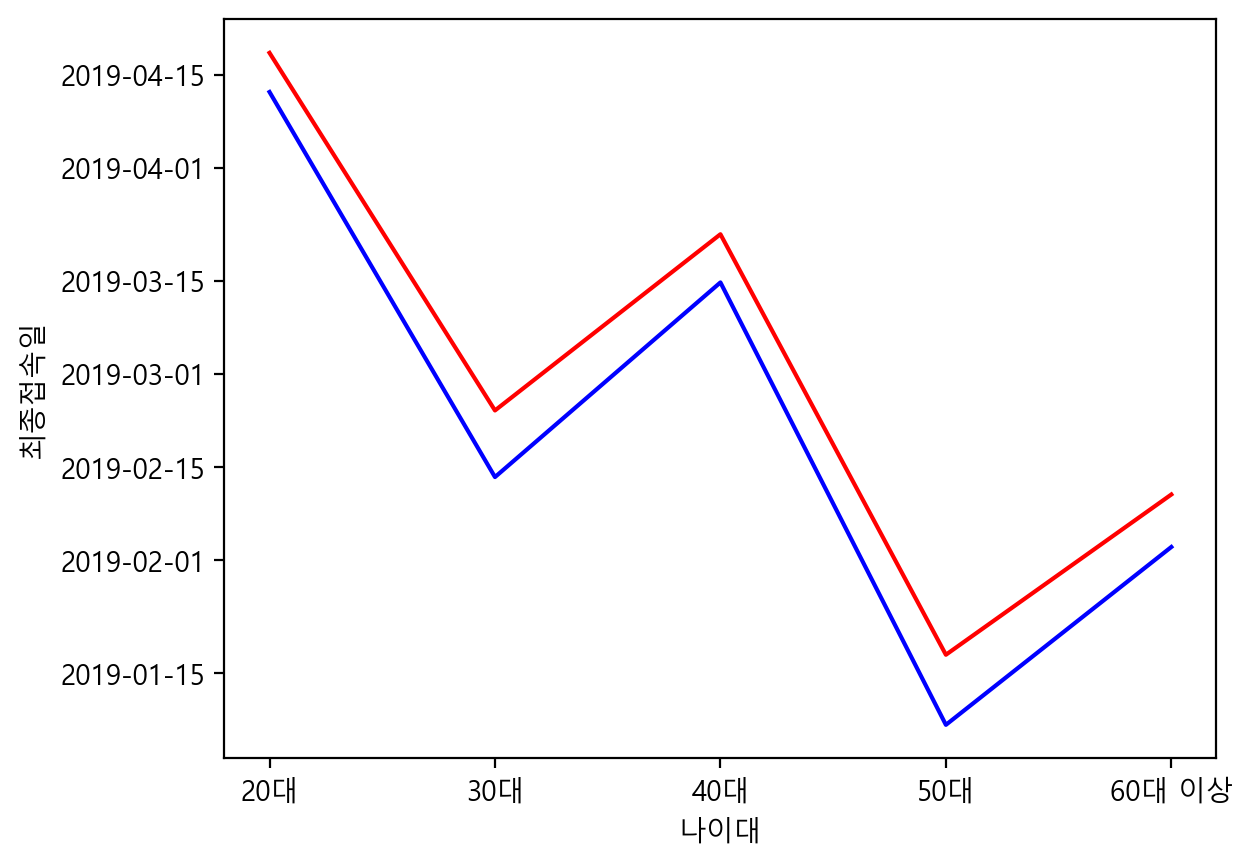

In [287]:
sns.lineplot(data = dt_finday, x = '나이대', y = '최종접속일', color = 'r', markers = True)
sns.lineplot(data = dt_finday, x = '나이대', y = '최종주문일', color = 'b', markers = True)

In [288]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41523 entries, 0 to 46748
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        41523 non-null  object        
 1   공급원가        41523 non-null  float64       
 2   네이버 포인트     41523 non-null  int64         
 3   배송번호        41523 non-null  object        
 4   배송비 정보      41523 non-null  object        
 5   배송시작일       41523 non-null  datetime64[ns]
 6   배송완료일       41523 non-null  datetime64[ns]
 7   사용한 적립금액    41523 non-null  int64         
 8   상품구매금액      41523 non-null  int64         
 9   상품명         41523 non-null  object        
 10  상품번호        41523 non-null  float64       
 11  상품별 추가할인금액  41523 non-null  int64         
 12  수량          41523 non-null  int64         
 13  수령인 주소      41523 non-null  object        
 14  주문 시 회원등급   41523 non-null  object        
 15  주문경로        41523 non-null  object        
 16  주문번호        41523 non-

### 나이대 별 유입경로

In [296]:
join_how = join_data.groupby(['나이대','유입경로'], as_index = False).agg(명_수 = ('결제수단', 'count'))
join_how.sort_values(by = '명_수', ascending = False, inplace = True)

In [297]:
px.bar(join_how, x = '유입경로', y = '명_수', color = '나이대')

### 네이버 유무에 따른 매출액

In [308]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41523 entries, 0 to 46748
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        41523 non-null  object        
 1   공급원가        41523 non-null  float64       
 2   네이버 포인트     41523 non-null  int64         
 3   배송번호        41523 non-null  object        
 4   배송비 정보      41523 non-null  object        
 5   배송시작일       41523 non-null  datetime64[ns]
 6   배송완료일       41523 non-null  datetime64[ns]
 7   사용한 적립금액    41523 non-null  int64         
 8   상품구매금액      41523 non-null  int64         
 9   상품명         41523 non-null  object        
 10  상품번호        41523 non-null  float64       
 11  상품별 추가할인금액  41523 non-null  int64         
 12  수량          41523 non-null  int64         
 13  수령인 주소      41523 non-null  object        
 14  주문 시 회원등급   41523 non-null  object        
 15  주문경로        41523 non-null  object        
 16  주문번호        41523 non-

In [329]:
join_naver = join_data.groupby(['네이버 포인트', '주문연도'], as_index = False)[['상품구매금액']].sum()

In [330]:
join_naver.loc[1:, '네이버 포인트'] = 1

In [331]:
join_naver

네이버 포인트  주문연도      상품구매금액
0        0  2017    79574720
1        1  2018  1563556640
2        1  2019  1333570120

<AxesSubplot: xlabel='주문연도', ylabel='상품구매금액'>

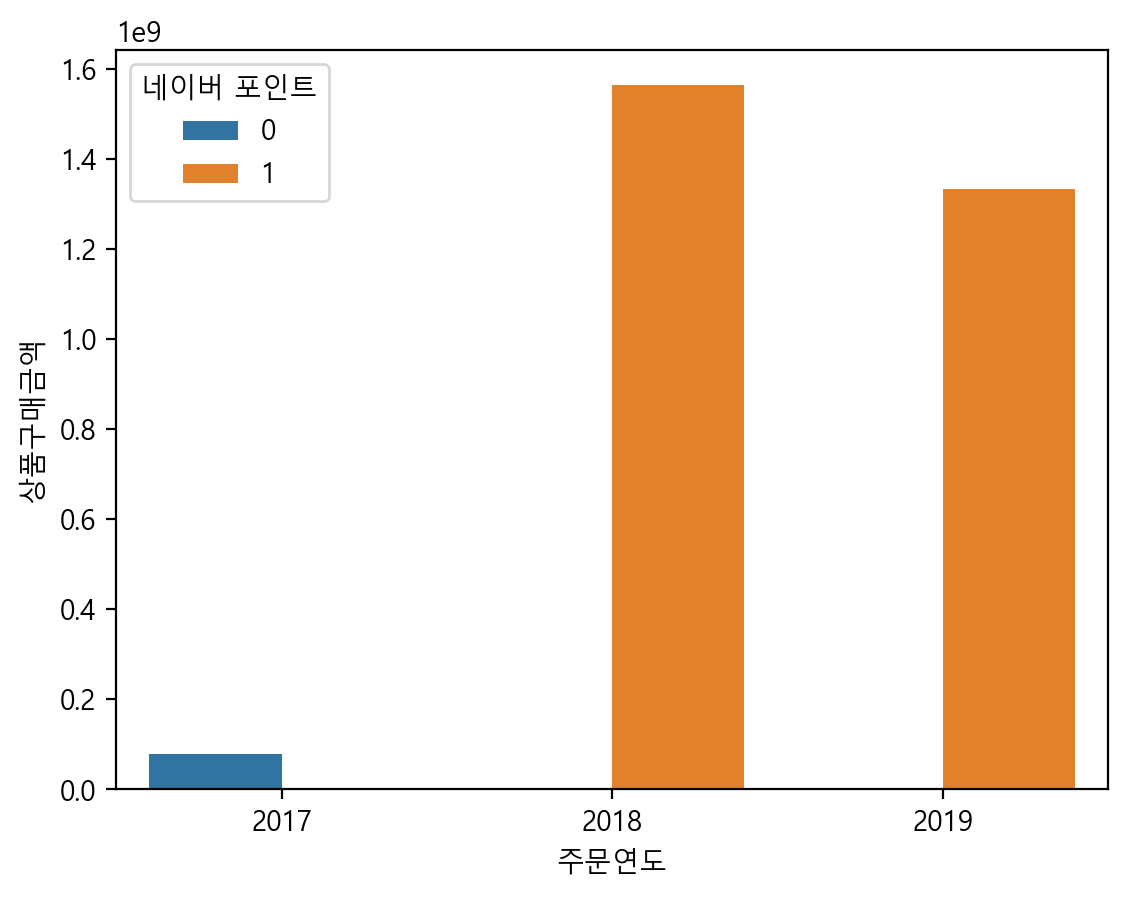

In [332]:
sns.barplot(data = join_naver, x = '주문연도', y = '상품구매금액', hue = '네이버 포인트')

### 월별 회원가입 수

In [336]:
dt2['회원 가입일'] = dt2['회원 가입일'].astype('str')

In [337]:
dt2['가입월'] = dt2['회원 가입일'].apply(lambda x: x[2:7])
dt2['가입월']

0       16-12
1       17-01
2       17-01
3       17-01
4       17-01
        ...  
6570    19-05
6571    19-06
6572    19-06
6573    19-06
6574    19-06
Name: 가입월, Length: 6575, dtype: object

<AxesSubplot: xlabel='가입월', ylabel='Count'>

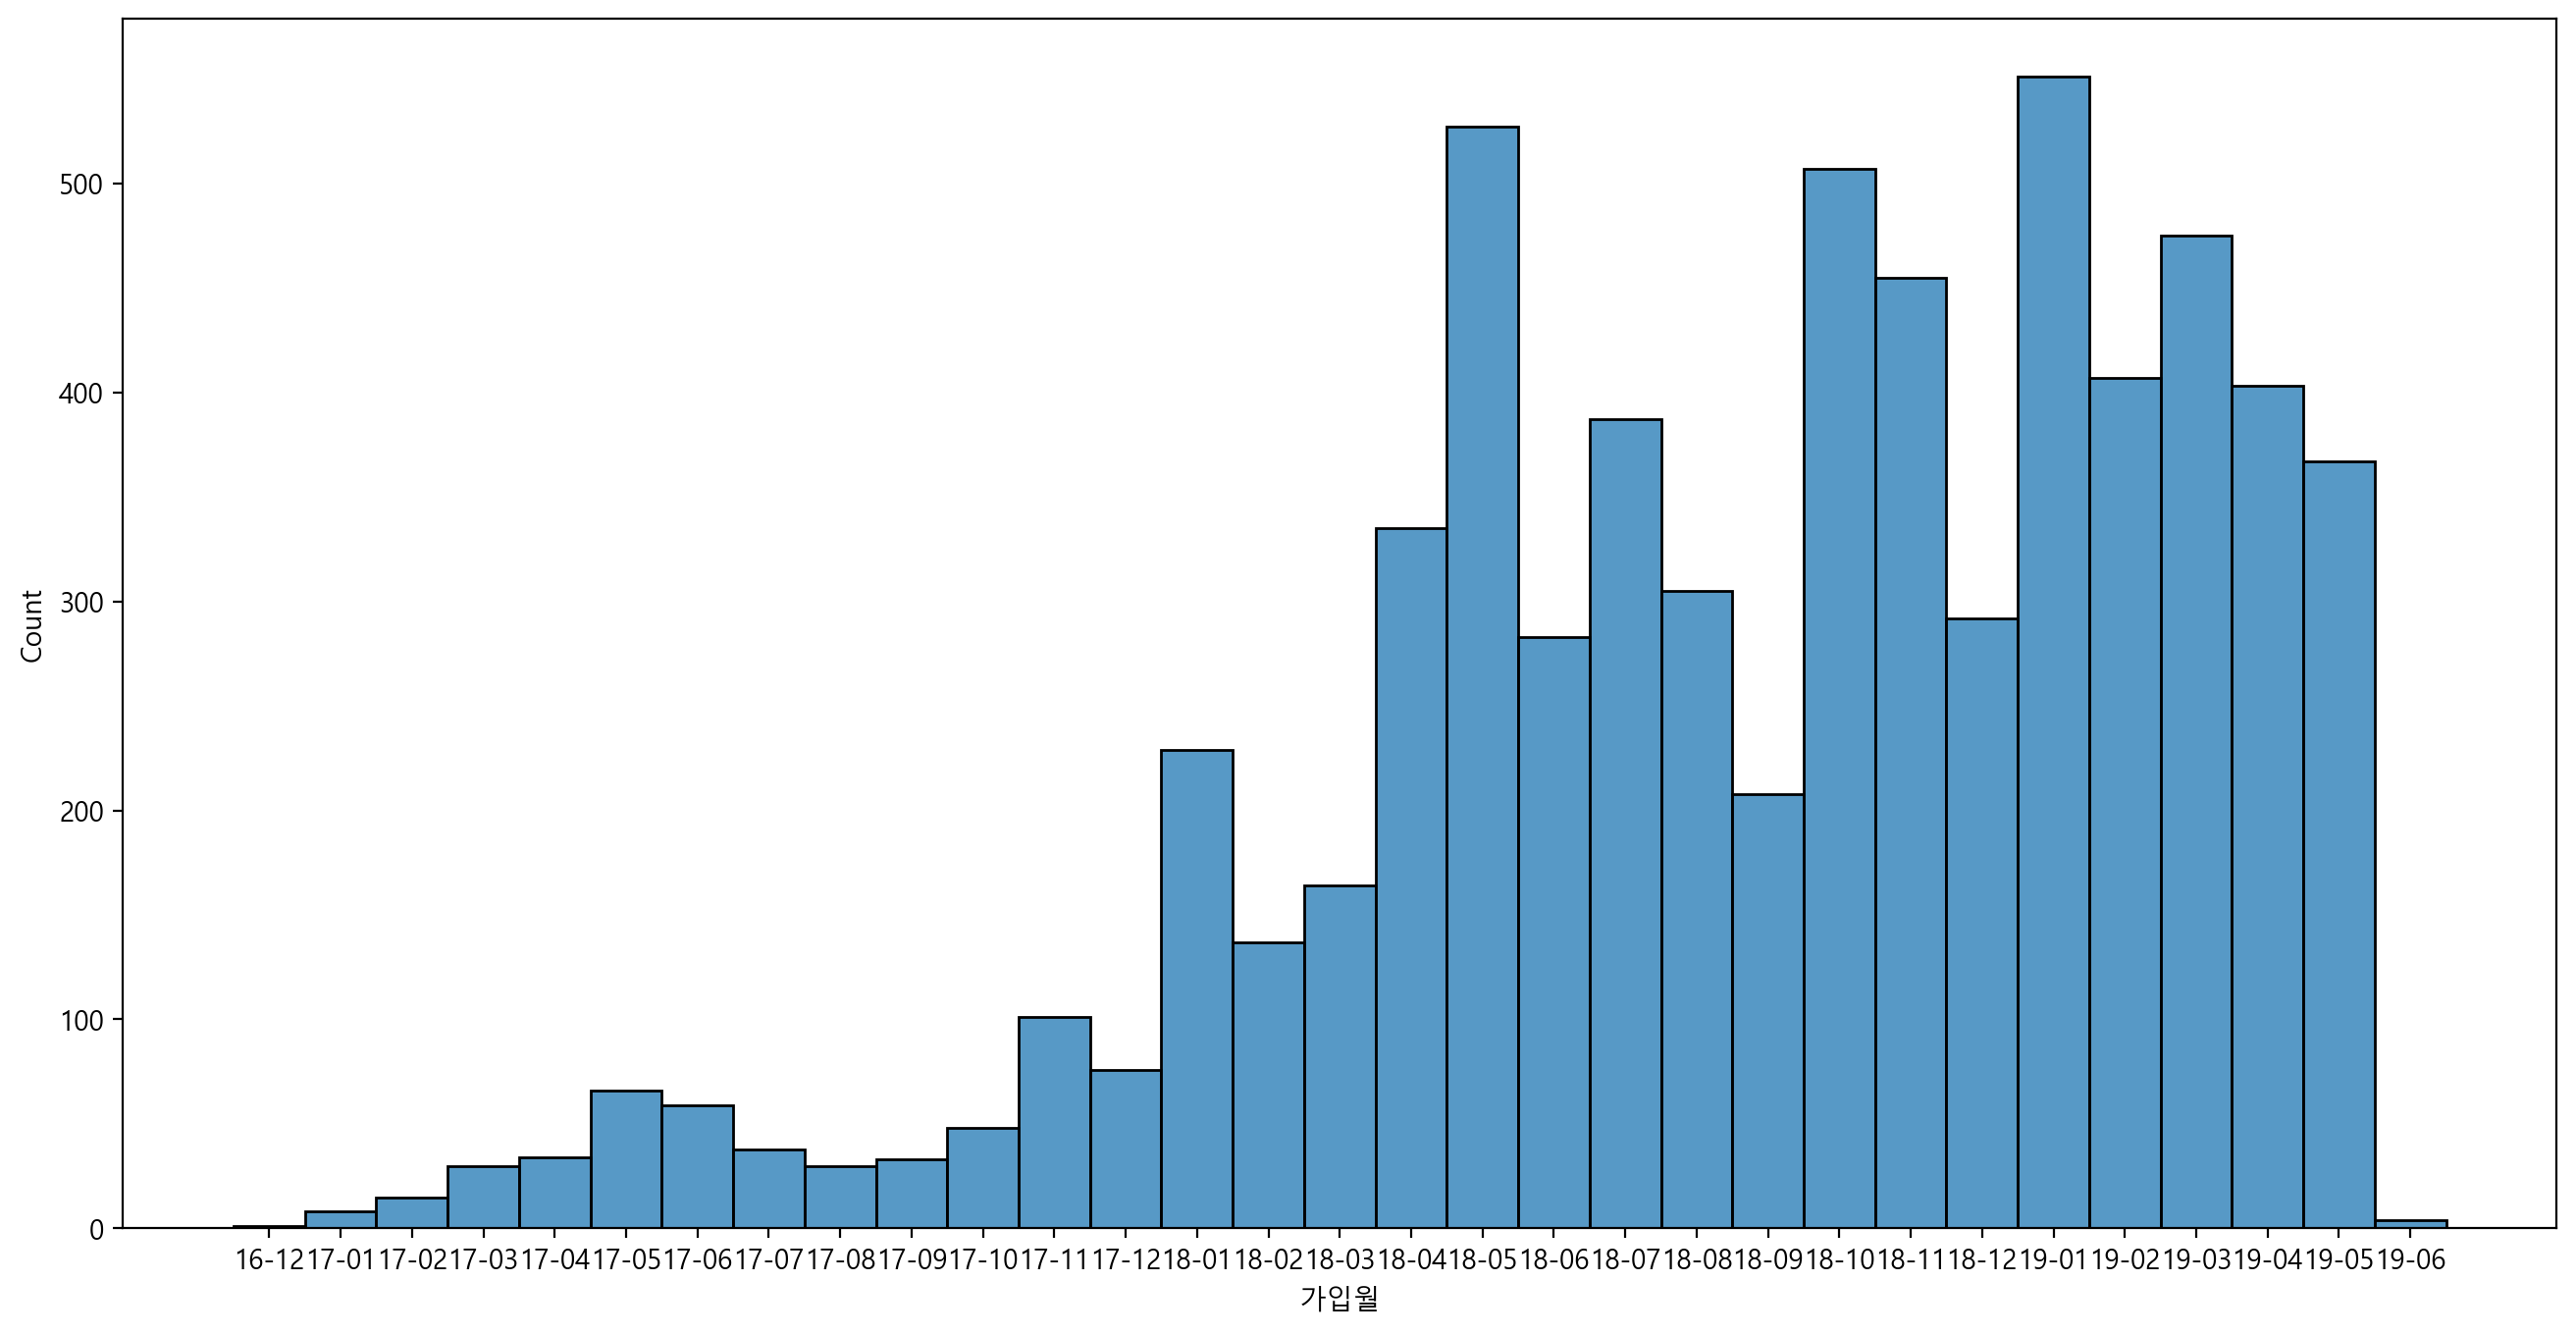

In [338]:
plt.figure(figsize=(16,8))
sns.histplot(data = dt2, x = '가입월')

### 지역별 배송기간과 장기 미접속 고객 수

C:\Users\operation\AppData\Local\Temp\ipykernel_8\3842109129.py:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

C:\Users\operation\AppData\Local\Temp\ipykernel_8\3842109129.py:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '충청남도'),
  Text(1, 0, '제주특별자치도'),
  Text(2, 0, '울산광역시'),
  Text(3, 0, '광주광역시'),
  Text(4, 0, '강원도'),
  Text(5, 0, '경상남도'),
  Text(6, 0, '서울특별시'),
  Text(7, 0, '전라남도'),
  Text(8, 0, '인천광역시'),
  Text(9, 0, '부산광역시'),
  Text(10, 0, '대구광역시'),
  Text(11, 0, '경상북도'),
  Text(12, 0, '경기도'),
  Text(13, 0, '전라북도'),
  Text(14, 0, '충청북도'),
  Text(15, 0, '대전광역시'),
  Text(16, 0, '세종특별자치시')])

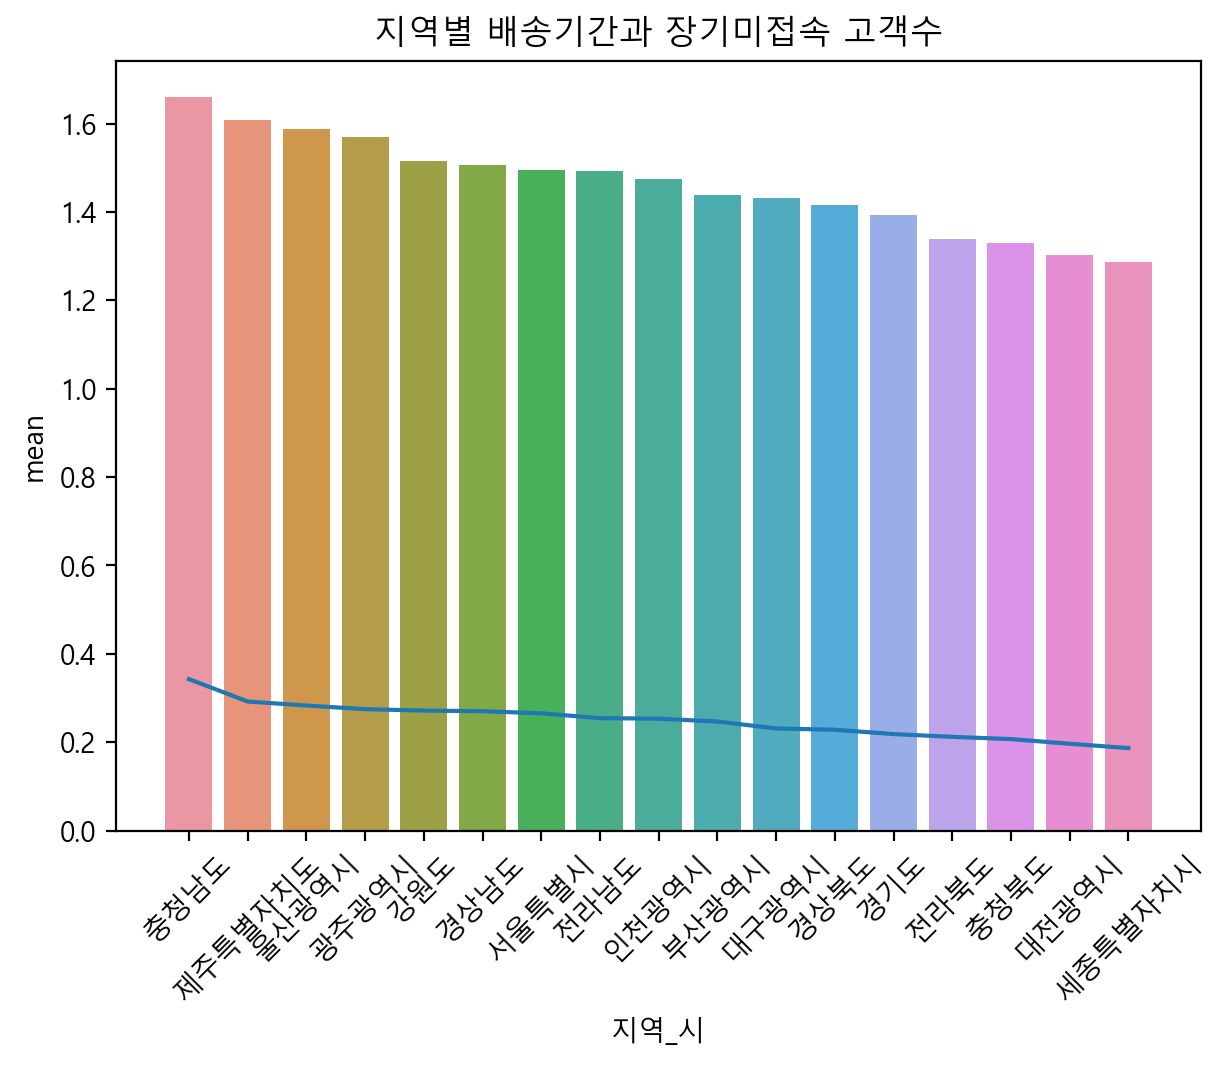

In [340]:
fig = plt.figure(figsize=(7,5))
dtDTE = join_data.groupby(['지역_시'], as_index = False).agg(mean = ('재고준비기간', 'mean'))
dtDTE.ascending = dtDTE.sort_values(by = 'mean', ascending = False)
dtDTC = join_data.groupby(['지역_시'], as_index = False).agg(mean = ('탈주고객', 'mean'))
dtDTC.ascending = dtDTC.sort_values(by = 'mean', ascending = False)
sns.barplot(data = dtDTE.ascending, x = '지역_시',y = 'mean')
sns.lineplot(data = dtDTC.ascending, x = '지역_시',y = 'mean').set_title('지역별 배송기간과 장기미접속 고객수')
plt.xticks(rotation = 45)